# Analysis of common sense around the world

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy
import json
import polars as pl
import os

import matplotlib
# Set default font to Arial
matplotlib.rcParams['font.family'] = 'Arial'
matplotlib.rcParams['font.sans-serif'] = 'Arial'

## Load data

### Statements

In [3]:
df_statements = pl.read_csv("../statements/statements_1.csv")

print("Number of statements:", df_statements.shape[0])
print("Examples:")
df_statements.head(5)

Number of statements: 10110
Examples:


id,statement,statementSource,origLanguage,published,statementMedian,createdAt,updatedAt,statementCategory,parentId,statement_zh,statement_ru,statement_pt,statement_ja,statement_hi,statement_fr,statement_es,statement_bn,statement_ar
i64,str,str,str,i64,f64,str,str,str,str,str,str,str,str,str,str,str,str,str
1,"""1 plus 1 is 2""","""category response""","""En""",0,1.0,"""2023-04-08 12:21:33""","""2023-04-08 12:21:33""","""Mathematics and logic""",null,"""1 加 1 等于 2。""","""1 плюс 1 равно 2.""","""1 mais 1 é igual a 2.""","""1 足す 1 は 2 です。""","""1 प्लस 1 2 के बराबर होता है।""","""1 plus 1 est égal à 2.""","""1 más 1 es igual a 2.""","""1 প্লাস 1 সমান 2।""","""1 زائد 1 يساوي 2."""
2,"""5 is alot bigger than 1""","""category response""","""En""",0,1.0,"""2023-04-08 12:21:33""","""2023-04-08 12:21:33""","""Mathematics and logic""",null,"""5 明显大于 1。""","""5 значительно больше 1.""","""5 é significativamente maior d…","""5 は 1 よりもかなり大きいです。""","""5, 1 से काफी बड़ा है।""","""5 est nettement plus grand que…","""5 es significativamente mayor …","""5 1 এর চেয়ে উল্লেখযোগ্যভাবে ব…","""5 أكبر بكثير من 1."""
3,"""a balanced diet and regular ex…","""category response""","""En""",0,1.0,"""2023-04-08 12:21:33""","""2023-04-08 12:21:33""","""Health and fitness""",null,"""为了保持健康，需要均衡饮食和定期运动。""","""Для поддержания здоровья необх…","""Para manter uma boa saúde, é p…","""健康を維持するには、バランスの取れた食事と定期的な運動が必要…","""अच्छे स्वास्थ्य को बनाए रखने क…","""Pour rester en bonne santé, il…","""Para mantener una buena salud,…","""ভাল স্বাস্থ্য বজায় রাখতে, একজ…","""للحفاظ على صحة جيدة، يحتاج الم…"
4,"""a ball is round""","""Concept Net""","""En""",0,1.0,"""2023-04-08 12:21:33""","""2023-04-08 12:21:33""","""Natural and physical sciences""",null,"""球是圆的。""","""Мяч круглый.""","""Uma bola é redonda.""","""ボールは丸い。""","""एक गेंद गोल होती है।""","""Une balle est ronde.""","""La pelota es redonda.""","""একটি বল বৃত্তাকার।""","""الكرة مستديرة."""
5,"""a baton twirler doesn't want a…","""Concept Net""","""En""",0,1.0,"""2023-04-08 12:21:33""","""2023-04-08 12:21:33""","""Human activities""",null,"""旋转警棍的人不想手指骨折。""","""Вертящий дубинку не захочет сл…","""Um girador de bastões não gost…","""バトントワラーなら指を骨折したくはないでしょう。""","""एक बैटन ट्विरलर एक टूटी हुई उं…","""Un joueur de matraque ne voudr…","""Un tirador de bastones no quer…","""একজন ব্যাটন টুয়ারলার ভাঙা আঙু…","""لن يرغب جهاز تدوير العصا في أن…"


### Individuals (survey respondents) and their responses

In [4]:
base_path = "../individuals"

# Get the name of all files in the directory
files = filter(lambda s: s.endswith(".csv"), sorted(os.listdir(base_path)))
files = list(map(lambda s: os.path.join(base_path, s), files))
print("Information about survey respondents are in the following files:")
for file in files:
    print("  -", file)

df_individuals = pd.concat([pd.read_csv(f) for f in files])

Information about survey respondents are in the following files:
  - ../individuals/individuals_1.csv
  - ../individuals/individuals_2.csv


In [5]:
print("Raw number of participants:", df_individuals.userSessionId.unique().shape[0])

Raw number of participants: 111587


In [6]:
base_path = "../answers"

# Get the name of all files in the directory
files = filter(lambda s: s.endswith(".csv"), sorted(os.listdir(base_path)))
files = list(map(lambda s: os.path.join(base_path, s), files))
print("Information about survey answers are in the following files:")
for file in files:
    print("  -", file)

df_answers = pd.concat([pd.read_csv(f) for f in files])

Information about survey answers are in the following files:
  - ../answers/answers_1.csv
  - ../answers/answers_2.csv


In [7]:
print("Raw number of answers:", df_answers.shape[0])

Raw number of answers: 795077


Show the number of unique individuals who answered, each user is assigned a unique sessionId

In [8]:
# Raw number of answers
print("Total number of answers:", df_answers.shape[0])

# Number of individuals
# (Each individual is identified by a unique sessionId)
gb = df_answers.groupby("sessionId")
# Count how many answers each individual gave
gb_counts = gb.count().iloc[:, 1]
# Only keep individuals who answered at least 15 questions
gb_counts = gb_counts[gb_counts >= 15]
print("Total number of individuals:", gb_counts.shape[0])

Total number of answers: 795077
Total number of individuals: 33652


In [9]:
df_answers = df_answers[df_answers["sessionId"].isin(gb_counts.index)]
print("Total number of answers after filtering:", df_answers.shape[0])

Total number of answers after filtering: 518869


### Statement features / Design points

In [10]:
# Statement properties
df_properties = pd.read_csv("../statementproperties/statementproperties_1.csv")
df_properties.head(6)

,id,name,available,createdAt,updatedAt,statementId
0,1,behavior,0,2023-04-08 12:23:26,2023-04-08 12:23:26,1
1,2,everyday,1,2023-04-08 12:23:26,2023-04-08 12:23:26,1
2,3,figure_of_speech,0,2023-04-08 12:23:26,2023-04-08 12:23:26,1
3,4,judgment,0,2023-04-08 12:23:26,2023-04-08 12:23:26,1
4,5,opinion,0,2023-04-08 12:23:26,2023-04-08 12:23:26,1
5,6,reasoning,1,2023-04-08 12:23:26,2023-04-08 12:23:26,1


## Calculating commonsensicality

### Statement level

In [11]:
statement_gb = df_answers.groupby("statementId")

# Percentage of agreeing with each statement
avg_vote_I_agree = statement_gb["I_agree"].mean()

# Majority vote
majority_I_agree = (avg_vote_I_agree >= 0.5).astype(int)

# Percentaage of predicting other people would agree
avg_vote_others_agree = statement_gb["others_agree"].mean()

In [12]:
statement_gb.count()

,id,I_agree,I_agree_reason,others_agree,others_agree_reason,perceived_commonsense,clarity,origLanguage,sessionId,createdAt,updatedAt,statement_number,clientVersion
statementId,,,,,,,,,,,,,
1,2,2,2,2,2,2,2,2,2,2,2,2,0
2,1,1,1,1,1,1,1,1,1,1,1,1,0
4,1,1,1,1,1,1,1,1,1,1,1,1,0
5,3,3,3,3,3,3,3,3,3,3,3,3,0
6,167,167,167,167,167,167,157,167,167,167,167,167,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10121,65,65,65,65,65,65,4,65,65,65,65,65,65
10122,72,72,72,72,72,72,6,72,72,72,72,72,72
10123,67,67,67,67,67,67,2,67,67,67,67,67,67


In [13]:
num_annotations_per_statement = statement_gb.count().iloc[:, 1]
print("Number of statements which received at least 1 annotation:", num_annotations_per_statement.shape[0])
print("Average number of annotations per statement              :", f"{num_annotations_per_statement.mean():.1f}")
print("Median number of annotations per statement               :", f"{num_annotations_per_statement.median():.0f}")

Number of statements which received at least 1 annotation: 2896
Average number of annotations per statement              : 179.2
Median number of annotations per statement               : 60


In [14]:
# fig, ax = plt.subplots(1, 1, figsize=(7, 4))

# ax.boxplot(num_annotations_per_statement)

<>:16: SyntaxWarning: invalid escape sequence '\p'
<>:16: SyntaxWarning: invalid escape sequence '\p'
<>:16: SyntaxWarning: invalid escape sequence '\p'
<>:16: SyntaxWarning: invalid escape sequence '\p'
/var/folders/w9/pp37d7zx5tj0x5_2k8t1x7tr0000gn/T/ipykernel_9065/1955510242.py:16: SyntaxWarning: invalid escape sequence '\p'
  ax.text(x=1800, y=1_700, s=f"Mean $\pm$ SD = {num_annotations_per_statement.mean():.1f} $\pm$ {num_annotations_per_statement.std():.0f}", size=16)
/var/folders/w9/pp37d7zx5tj0x5_2k8t1x7tr0000gn/T/ipykernel_9065/1955510242.py:16: SyntaxWarning: invalid escape sequence '\p'
  ax.text(x=1800, y=1_700, s=f"Mean $\pm$ SD = {num_annotations_per_statement.mean():.1f} $\pm$ {num_annotations_per_statement.std():.0f}", size=16)


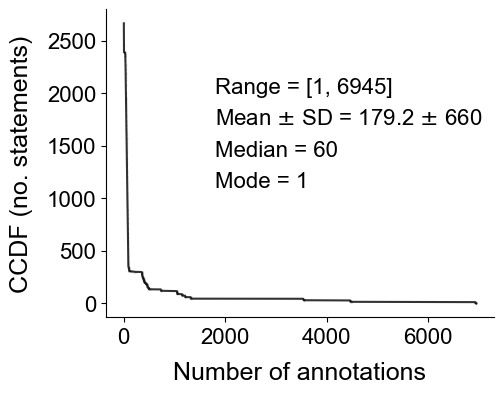

In [15]:
# CDF of number of annotations per statement
fig, ax = plt.subplots(1, 1, figsize=(5, 4))

num_unique_annotations = num_annotations_per_statement.unique()
num_unique_annotations.sort()

pass_threshold = np.array([sum(num_annotations_per_statement <= t) for t in num_unique_annotations])
# pass_threshold = pass_threshold / pass_threshold.max()
pass_threshold = pass_threshold.max() - pass_threshold
ax.scatter(num_unique_annotations, pass_threshold, color="black", alpha=0.054, s=1)
ax.plot(num_unique_annotations, pass_threshold, color="black", alpha=0.8)
ax.set_xlabel("Number of annotations", size=18, labelpad=10)
ax.set_ylabel("CCDF (no. statements)", size=18, labelpad=10)

ax.text(x=1800, y=2_000, s=f"Range = [{num_annotations_per_statement.min()}, {num_annotations_per_statement.max()}]", size=16)
ax.text(x=1800, y=1_700, s=f"Mean $\pm$ SD = {num_annotations_per_statement.mean():.1f} $\pm$ {num_annotations_per_statement.std():.0f}", size=16)
ax.text(x=1800, y=1_400, s=f"Median = {num_annotations_per_statement.median():.0f}", size=16)
ax.text(x=1800, y=1_100, s=f"Mode = {num_annotations_per_statement.mode()[0]}", size=16)

ax.tick_params(axis="both", which="major", labelsize=16)
sns.despine(ax=ax, top=True, left=False, right=True, bottom=False)
plt.savefig("figures/descriptives/answers_per_statement.png", bbox_inches="tight")

In [16]:
statement_comm = pd.DataFrame(0., index=avg_vote_I_agree.index, columns=["c_i", "a_i", "m_i"])
statement_comm["c_i"] = 2 * np.abs(avg_vote_I_agree - 0.5)
statement_comm["a_i"] = np.where(avg_vote_I_agree >= 0.5, avg_vote_others_agree, 1 - avg_vote_others_agree)
statement_comm["m_i"] = np.sqrt(statement_comm["c_i"] * statement_comm["a_i"])

In [17]:
print((statement_comm * 100).describe().round(2).to_markdown())


|       |     c_i |     a_i |     m_i |
|:------|--------:|--------:|--------:|
| count | 2896    | 2896    | 2896    |
| mean  |   66.47 |   76.28 |   68.44 |
| std   |   31.96 |   20.71 |   27.99 |
| min   |    0    |    0    |    0    |
| 25%   |   41.18 |   62.2  |   50.02 |
| 50%   |   76    |   80.13 |   74.45 |
| 75%   |   95.16 |   94.29 |   92.56 |
| max   |  100    |  100    |  100    |


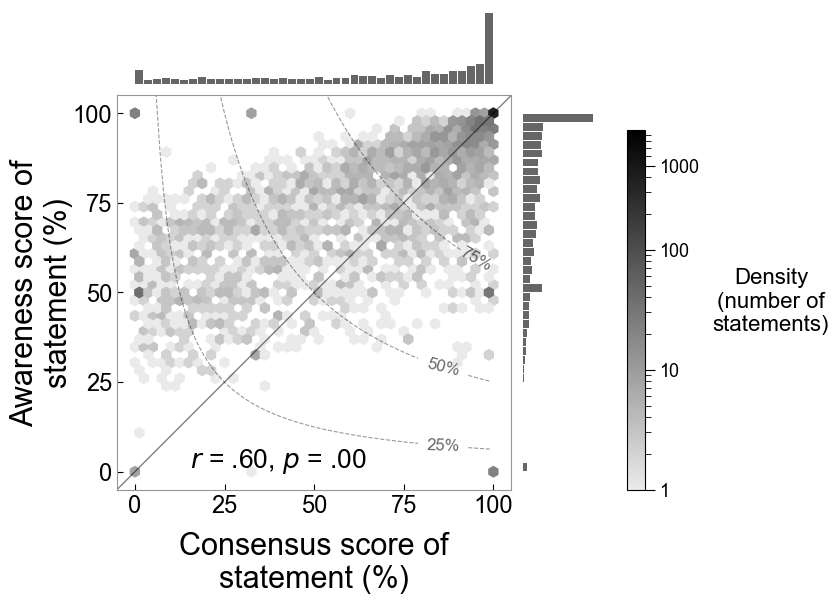

In [18]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import LinearSegmentedColormap
from scipy.stats import spearmanr, pearsonr
from sklearn.metrics import r2_score
import re

# Start with a square Figure.
fig = plt.figure(figsize=(6, 6))
# Add a gridspec with two rows and two columns and a ratio of 1 to 4 between
# the size of the marginal Axes and the main Axes in both directions.
# Also adjust the subplot parameters for a square plot.
gs = fig.add_gridspec(2, 2,  width_ratios=(8, 1.5), height_ratios=(1.5, 8),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)
# Create the Axes.
ax = fig.add_subplot(gs[1, 0])

colors = [np.array((235, 235, 235)) / 256, # RGB values for gray
          "black"]  
custom_cmap = LinearSegmentedColormap.from_list("gray_orange", colors)

c_i = statement_comm["c_i"].values
a_i = statement_comm["a_i"].values
x = c_i * 100
y = a_i * 100

hb = ax.hexbin(
    x=x,
    y=y,
    C=None,
    gridsize=40,
    mincnt=1,
    cmap=custom_cmap,
    xscale="linear",
    yscale="linear",
    bins="log",
    vmin=1,
    vmax=1000,
    extent=(0, 100, 0, 100),
    marginals=False
)

res = pearsonr(x, y,
             alternative="two-sided")

r, pval = res.statistic, res.pvalue
ax.text(x=40, y=3, 
        s=f"$r$ = {re.sub('0(?=[.])', '', ('%0.2f' % r))}, " + \
          f"$p$ = {re.sub('0(?=[.])', '', ('%0.2f' % pval))}",
        va="center", ha="center", size=19)

ax.set_xlim([-5, 105]); ax.set_ylim([-5, 105])
ax.plot([-100, 200], [-100, 200], color="black", linewidth=1, alpha=0.5)

ax.set_xlabel(f"Consensus score of\nstatement (%)", 
              size=22, labelpad=10)
ax.set_ylabel(f"Awareness score of\nstatement (%)", 
              size=22, labelpad=0)


ax.set_xticks([0, 25, 50, 75, 100], [0, 25, 50, 75, 100])
ax.set_yticks([0, 25, 50, 75, 100], [0, 25, 50, 75, 100])
ax.tick_params(axis="both", direction="in", size=4, labelsize=17)
ax.set_aspect("equal")

for z, (left, right), rotation in zip(
    [25, 50, 75],
    [(80, 92), (80, 92), (92, 98)],
    [-2, -14, -30]
):
    xs = np.arange(0, 101, 1, dtype=float)
    ys = np.ones_like(xs)
    ys[xs > 0] = z**2 / xs[xs > 0]
    xs = xs[1:-1]
    ys = ys[1:-1]

    idx_left = xs < left
    xs_left = xs[idx_left]
    ys_left = ys[idx_left]

    idx_right = xs > right
    xs_right = xs[idx_right]
    ys_right = ys[idx_right]

    ax.plot(xs_left, ys_left, linestyle="--", linewidth=0.8, color="k", alpha=0.4)
    ax.plot(xs_right, ys_right, linestyle="--", linewidth=0.8, color="k", alpha=0.4)

    x_ = 0.5 * (left+right)
    y_ = z**2 / x_
    ax.text(x=x_, y=y_, s=f"{z:.0f}%", ha="center", va="center", rotation=rotation, 
            size=12, alpha=0.6)

cbaxes = fig.add_axes([0.95, 0.1, 0.03, 0.6]) 
cb = plt.colorbar(hb, cax=cbaxes, ticks=[1, 10, 100, 500], orientation="vertical",
                   pad=0.05, aspect=100, fraction=0.1)

# cb.outline.set_visible(False)
cb.ax.tick_params(size=7, direction="out", which="major", color="black")
cb.ax.tick_params(size=4, direction="out", which="minor", color="black")

cb.ax.set_yticklabels([1, 10, 100, 1_000], size=13)
cb.ax.set_title('Density\n(number of\nstatements)', size=16, rotation=0, y=0.5, x=8, 
                va="center", ha="center")


for spine in ax.spines.values():
    spine.set_edgecolor(np.array((150, 150, 150)) / 256)


ax_main=ax

ax = fig.add_subplot(gs[0, 0], sharex=ax_main)
bars, ints = np.histogram(x, bins=np.linspace(0, 100, num=41))
ints = [np.mean([ints[i], ints[i+1]]) for i in range(len(ints) - 1)]
bars = bars / bars.sum()
ax.bar(ints, bars, width=2.2, color="black", alpha=0.6)
sns.despine(ax=ax, top=True, bottom=True, left=True, right=True)
ax.set_yticks([])
ax.tick_params(size=0, labelbottom=False, axis="both")

ax = fig.add_subplot(gs[1, 1], sharey=ax_main)
bars, ints = np.histogram(y, bins=np.linspace(0, 100, num=41))
ints = [np.mean([ints[i], ints[i+1]]) for i in range(len(ints) - 1)]
bars = bars / bars.sum()
ax.barh(ints, bars, height=2.2, color="k", alpha=0.6)
# ax.set_yticks([])
ax.tick_params(size=0, labelbottom=False, axis="both")
sns.despine(ax=ax, top=True, bottom=True, left=True, right=True)
ax.tick_params(size=0, labelbottom=False, axis="both", labelsize=0, labelcolor="w")

plt.savefig("figures/descriptives/statement_level_comm_humans.png", bbox_inches="tight")

### Individual level

In [19]:
majority_I_agree.name = "majority_I_agree"
df_joined = df_answers.merge(majority_I_agree, how="left", left_on="statementId", right_on="statementId", right_index=True)
# df_joined.rename(columns={"statementId_y": "majority_I_agree"}, inplace=True)

df_joined["I_agree_correct"] = (df_joined["I_agree"] == df_joined["majority_I_agree"]).astype(int)
df_joined["others_agree_correct"] = (df_joined["others_agree"] == df_joined["majority_I_agree"]).astype(int)

In [20]:
df_joined

,id,I_agree,I_agree_reason,others_agree,others_agree_reason,perceived_commonsense,clarity,origLanguage,sessionId,createdAt,updatedAt,statement_number,statementId,clientVersion,majority_I_agree,I_agree_correct,others_agree_correct
0,1,1,It's obvious,1,I think most people have good judgement with r...,1,Clear: it is clearly written and I can underst...,en,uZBSJf5x8X7I1vvwiX4K7YfrB7hY_tkk,2023-06-14 17:11:11,2023-06-14 17:11:11,6,6,NaN,1,1,1
1,2,1,It's something I learned,1,I think most people have good judgement with r...,1,Clear: it is clearly written and I can underst...,en,siFSQa8F_h3woRq5maLEsmoDQmA-wsnn,2023-06-14 17:11:17,2023-06-14 17:11:17,6,6,NaN,1,1,1
2,3,1,It's something I learned,1,I think most people have good judgement with r...,1,Clear: it is clearly written and I can underst...,en,7A2Xy3lMfn_Pe12DeucuE-1swxAv34xv,2023-06-14 17:11:23,2023-06-14 17:11:23,6,6,NaN,1,1,1
4,5,0,I don't know,0,I don't know,0,Confusing: I don't quite understand what it me...,en,uZBSJf5x8X7I1vvwiX4K7YfrB7hY_tkk,2023-06-14 17:11:34,2023-06-14 17:11:34,149,149,NaN,1,0,0
5,6,1,It's my opinion,1,I think most people have good judgement with r...,0,Clear: it is clearly written and I can underst...,en,PnnapzXro32zODFqAuJHd1w0G3-XDsYU,2023-06-14 17:11:42,2023-06-14 17:11:42,6,6,NaN,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304249,795073,1,It's my opinion,1,I think it's mostly a matter of opinion,0,NaN,en,c4gYcigasaz06eUvSq0pi3kb6qOOraur,2025-05-18 10:37:44,2025-05-18 10:37:44,9804,9804,fcc5918,1,1,1
304250,795074,1,It's obvious,1,I don't know,1,NaN,en,c4gYcigasaz06eUvSq0pi3kb6qOOraur,2025-05-18 10:38:09,2025-05-18 10:38:09,9972,9972,fcc5918,1,1,1
304251,795075,1,It's obvious,1,I think most people have good judgement with r...,1,NaN,en,c4gYcigasaz06eUvSq0pi3kb6qOOraur,2025-05-18 10:38:25,2025-05-18 10:38:25,10004,10004,fcc5918,1,1,1
304252,795076,1,It's obvious,1,I think it's mostly a matter of opinion,1,NaN,en,c4gYcigasaz06eUvSq0pi3kb6qOOraur,2025-05-18 10:39:22,2025-05-18 10:39:22,9589,9589,fcc5918,1,1,1


In [21]:
individual_gb = df_joined.groupby("sessionId")

individual_comm = pd.DataFrame(0., index=individual_gb.groups.keys(), columns=["C_j", "A_j", "M_j"])
individual_comm["C_j"] = individual_gb["I_agree_correct"].mean()
individual_comm["A_j"] = individual_gb["others_agree_correct"].mean()
individual_comm["M_j"] = np.sqrt(individual_comm["C_j"] * individual_comm["A_j"])

In [22]:
individual_gb["I_agree_correct"].mean()

sessionId
--6nqeeJ13ZjiAK2Gse81gFRUfJ6x-Xg    0.933333
--ByVt4h1_pUa5IUMdb6qnoGv3PpItOf    0.733333
--C2VDuAu_S-ifoS_GFEi2kob9DpGi0T    0.666667
--U1hjkQzWwRHV0bbSe_ALa017L2aO0h    0.800000
--XUTLSOILpetaWQB5wcG3ikQ6c21HPk    0.933333
                                      ...   
zzZOOswGk51fX3neZ-7o2zcnPLdnbS5f    0.933333
zz_d55ThY8vUjaYOzx2fH1zJ9DDnzjcE    0.933333
zzdxIlU8UbmzcmQZldr5COb-wCjWLlI3    1.000000
zzfMKRDqfvbNGIS5gL6IxE5XeCaVCb-_    0.866667
zzlWL_F3Wu96vyQ6-NEIGm9GL7DnoRxw    0.933333
Name: I_agree_correct, Length: 33652, dtype: float64

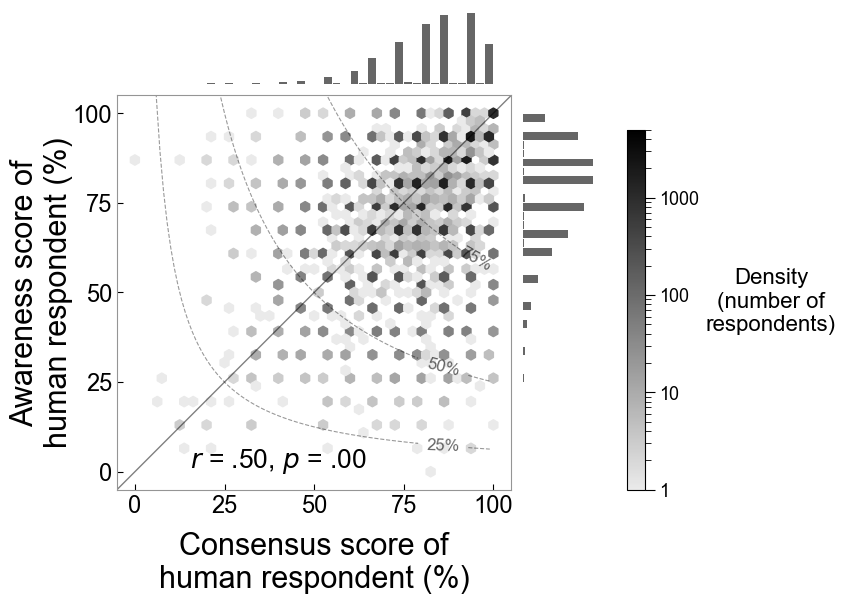

In [510]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import LinearSegmentedColormap
from scipy.stats import spearmanr, pearsonr
from sklearn.metrics import r2_score
import re

# Start with a square Figure.
fig = plt.figure(figsize=(6, 6))
# Add a gridspec with two rows and two columns and a ratio of 1 to 4 between
# the size of the marginal Axes and the main Axes in both directions.
# Also adjust the subplot parameters for a square plot.
gs = fig.add_gridspec(2, 2,  width_ratios=(8, 1.5), height_ratios=(1.5, 8),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)
# Create the Axes.
ax = fig.add_subplot(gs[1, 0])

colors = [np.array((235, 235, 235)) / 256, # RGB values for gray
          "black"]  
custom_cmap = LinearSegmentedColormap.from_list("gray_orange", colors)

C_j = individual_comm["C_j"].values
A_j = individual_comm["A_j"].values
x = C_j * 100
y = A_j * 100

hb = ax.hexbin(
    x=x,
    y=y,
    C=None,
    gridsize=40,
    mincnt=1,
    cmap=custom_cmap,
    xscale="linear",
    yscale="linear",
    bins="log",
    vmin=1,
    vmax=5000,
    extent=(0, 100, 0, 100),
    marginals=False
)

res = pearsonr(x, y,
             alternative="two-sided")

r, pval = res.statistic, res.pvalue
ax.text(x=40, y=3, 
        s=f"$r$ = {re.sub('0(?=[.])', '', ('%0.2f' % r))}, " + \
          f"$p$ = {re.sub('0(?=[.])', '', ('%0.2f' % pval))}",
        va="center", ha="center", size=19)

ax.set_xlim([-5, 105]); ax.set_ylim([-5, 105])
ax.plot([-100, 200], [-100, 200], color="black", linewidth=1, alpha=0.5)

ax.set_xlabel(f"Consensus score of\nhuman respondent (%)", 
              size=22, labelpad=10)
ax.set_ylabel(f"Awareness score of\nhuman respondent (%)", 
              size=22, labelpad=0)


ax.set_xticks([0, 25, 50, 75, 100], [0, 25, 50, 75, 100])
ax.set_yticks([0, 25, 50, 75, 100], [0, 25, 50, 75, 100])
ax.tick_params(axis="both", direction="in", size=4, labelsize=17)
ax.set_aspect("equal")

for z, (left, right), rotation in zip(
    [25, 50, 75],
    [(80, 92), (80, 92), (92, 98)],
    [-2, -14, -30]
):
    xs = np.arange(0, 101, 1, dtype=float)
    ys = np.ones_like(xs)
    ys[xs > 0] = z**2 / xs[xs > 0]
    xs = xs[1:-1]
    ys = ys[1:-1]

    idx_left = xs < left
    xs_left = xs[idx_left]
    ys_left = ys[idx_left]

    idx_right = xs > right
    xs_right = xs[idx_right]
    ys_right = ys[idx_right]

    ax.plot(xs_left, ys_left, linestyle="--", linewidth=0.8, color="k", alpha=0.4)
    ax.plot(xs_right, ys_right, linestyle="--", linewidth=0.8, color="k", alpha=0.4)

    x_ = 0.5 * (left+right)
    y_ = z**2 / x_
    ax.text(x=x_, y=y_, s=f"{z:.0f}%", ha="center", va="center", rotation=rotation, 
            size=12, alpha=0.6)

cbaxes = fig.add_axes([0.95, 0.1, 0.03, 0.6]) 
cb = plt.colorbar(hb, cax=cbaxes, ticks=[1, 10, 100, 1_000, 10_000], orientation="vertical",
                   pad=0.05, aspect=100, fraction=0.1)

# cb.outline.set_visible(False)
cb.ax.tick_params(size=7, direction="out", which="major", color="black")
cb.ax.tick_params(size=4, direction="out", which="minor", color="black")

cb.ax.set_yticklabels([1, 10, 100, 1_000, 10_000], size=13)
cb.ax.set_title('Density\n(number of\nrespondents)', size=16, rotation=0, y=0.5, x=8, 
                va="center", ha="center")


for spine in ax.spines.values():
    spine.set_edgecolor(np.array((150, 150, 150)) / 256)


ax_main=ax

ax = fig.add_subplot(gs[0, 0], sharex=ax_main)
bars, ints = np.histogram(x, bins=np.linspace(0, 100, num=41))
ints = [np.mean([ints[i], ints[i+1]]) for i in range(len(ints) - 1)]
bars = bars / bars.sum()
ax.bar(ints, bars, width=2.2, color="black", alpha=0.6)
sns.despine(ax=ax, top=True, bottom=True, left=True, right=True)
ax.set_yticks([])
ax.tick_params(size=0, labelbottom=False, axis="both")

ax = fig.add_subplot(gs[1, 1], sharey=ax_main)
bars, ints = np.histogram(y, bins=np.linspace(0, 100, num=41))
ints = [np.mean([ints[i], ints[i+1]]) for i in range(len(ints) - 1)]
bars = bars / bars.sum()
ax.barh(ints, bars, height=2.2, color="k", alpha=0.6)
# ax.set_yticks([])
ax.tick_params(size=0, labelbottom=False, axis="both")
sns.despine(ax=ax, top=True, bottom=True, left=True, right=True)
ax.tick_params(size=0, labelbottom=False, axis="both", labelsize=0, labelcolor="w")

# plt.savefig("figures/individual_level_comm_humans.pdf", bbox_inches="tight")

#### Compare with original data

In [24]:
# Human ratings
# Do you agree with this statement?
individual = pd.read_csv("~/dev/commonsense-lm/llm_rating_trials/data/results/individual_ratings.csv", index_col=0)

# Do you think most people would agree with this statement?
group = pd.read_csv("~/dev/commonsense-lm/llm_rating_trials/data/results/group_ratings.csv", index_col=0)

# Majority voting (skip participants who didn't answer)
avg_vote_per_q = individual.mean(axis=1, skipna=True)
maj_i = (avg_vote_per_q >= 0.5).astype(int)

# Majority of "others agree" answers by humans
maj_others = (group.mean(1, skipna=True) >= 0.5).astype(int)


individual_comm_org = pd.DataFrame(0, columns=["C_j", "A_j", "M_j"],
                                   index=individual.columns)

# Person: consensus
individual_comm_org["C_j"] = [(individual.loc[:,j].dropna().astype(int) == \
                  maj_i.loc[individual.loc[:,j].dropna().index]).mean()
                 for j in individual.columns]

# Person: awareness
individual_comm_org["A_j"] = pd.Series([(group.loc[:,j].dropna().astype(int) == \
                  maj_i.loc[group.loc[:,j].dropna().index]).mean()
                 for j in group.columns],
                index=group.columns)

# Person: commonsensicality
individual_comm_org["M_j"] = np.sqrt(individual_comm_org["C_j"] * individual_comm_org["A_j"])

In [25]:
individual_comm_org

,C_j,A_j,M_j
0,0.82,0.84,0.829940
1,0.76,0.80,0.779744
2,0.72,0.74,0.729932
3,0.66,0.66,0.660000
4,0.76,0.82,0.789430
...,...,...,...
2041,0.82,0.78,0.799750
2042,0.86,0.82,0.839762
2043,0.64,0.62,0.629921
2044,0.82,0.78,0.799750


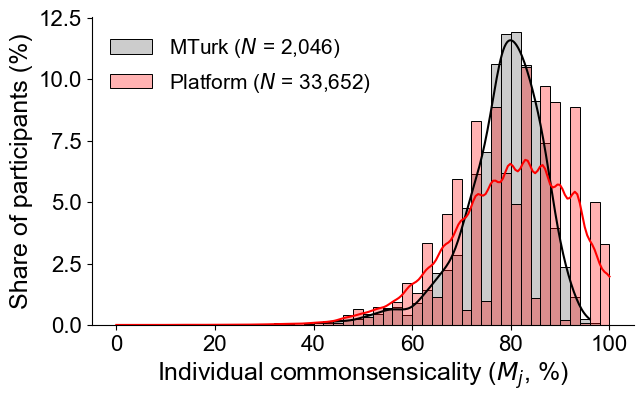

In [598]:
fig, ax = plt.subplots(1, 1, figsize=(7, 4))

sns.histplot(individual_comm_org["M_j"] * 100, bins=np.arange(0, 101, 2), kde=True, stat="percent", color="black", 
             alpha=0.2, label=f"MTurk ($N$ = {individual_comm_org.shape[0]:,})", line_kws=dict(lw=1.5))
sns.histplot(individual_comm["M_j"] * 100, bins=np.arange(0, 101, 2), kde=True, stat="percent", ax=ax, color="red", 
             alpha=0.3, label=f"Platform ($N$ = {individual_comm.shape[0]:,})",  line_kws=dict(lw=1.5))

ax.tick_params(axis="both", which="major", labelsize=16)
ax.set_xlabel("Individual commonsensicality ($M_j$, %)", size=18)
ax.set_ylabel("Share of participants (%)", size=18)

sns.despine(ax=ax)

ax.legend(frameon=False, fontsize=15)

plt.savefig("figures/descriptives/individual_commonsensicality_comparison.png", bbox_inches="tight", dpi=120)

In [27]:
individual_comm_comparison = pd.concat([(individual_comm_org["M_j"] * 100).describe(), (individual_comm["M_j"] * 100).describe()], axis=1)
individual_comm_comparison.columns = ["MTurk", "Platform"]
print(individual_comm_comparison.round(2).to_markdown())

|       |   MTurk |   Platform |
|:------|--------:|-----------:|
| count | 2046    |   33652    |
| mean  |   78.39 |      79.75 |
| std   |    8.13 |      11.95 |
| min   |   42.33 |       0    |
| 25%   |   74.46 |      73.03 |
| 50%   |   79.43 |      80    |
| 75%   |   83.98 |      89.94 |
| max   |   96    |     100    |


In [28]:
from scipy.stats import mannwhitneyu

sample2 = individual_comm_org["M_j"] * 100
sample1 = individual_comm["M_j"] * 100

# sample1 and sample2 are your data arrays
stat, p = mannwhitneyu(sample1, sample2, alternative='two-sided')
print(f"Statistic: {stat}, p-value: {p}")
print("AUC = ", stat / (sample1.shape[0] * sample2.shape[0]))

Statistic: 37937053.0, p-value: 8.182609307143667e-15
AUC =  0.5509942689820797


In [29]:
from scipy.stats import ttest_ind

stat, p = ttest_ind(sample1, sample2, equal_var=False)
print(f"Statistic: {stat}, p-value: {p}")

mean1, mean2 = np.mean(sample1), np.mean(sample2)
std1, std2 = np.std(sample1, ddof=1), np.std(sample2, ddof=1)
n1, n2 = len(sample1), len(sample2)

# Pooled standard deviation
s_pooled = np.sqrt(((n1 - 1)*std1**2 + (n2 - 1)*std2**2) / (n1 + n2 - 2))

# Cohen's d
cohens_d = (mean1 - mean2) / s_pooled
print(f"Cohen's d: {cohens_d}")

Statistic: 7.145813231202347, p-value: 1.1553471661799368e-12
Cohen's d: 0.1161596977746293


## Statement features

In [406]:
df_properties

,id,name,available,createdAt,updatedAt,statementId
0,1,behavior,0,2023-04-08 12:23:26,2023-04-08 12:23:26,1
1,2,everyday,1,2023-04-08 12:23:26,2023-04-08 12:23:26,1
2,3,figure_of_speech,0,2023-04-08 12:23:26,2023-04-08 12:23:26,1
3,4,judgment,0,2023-04-08 12:23:26,2023-04-08 12:23:26,1
4,5,opinion,0,2023-04-08 12:23:26,2023-04-08 12:23:26,1
...,...,...,...,...,...,...
60655,60656,everyday,1,2025-02-18 14:49:40,2025-02-18 14:49:40,8859
60656,60657,figure_of_speech,0,2025-02-18 14:49:40,2025-02-18 14:49:40,8859
60657,60658,judgment,1,2025-02-18 14:49:40,2025-02-18 14:49:40,8859
60658,60659,opinion,1,2025-02-18 14:49:40,2025-02-18 14:49:40,8859


In [407]:
properties_wide = df_properties.pivot(index="statementId", columns="name", values="available")
properties_wide

name,behavior,everyday,figure_of_speech,judgment,opinion,reasoning
statementId,,,,,,
1,0,1,0,0,0,1
2,0,0,0,0,0,0
3,1,1,0,1,0,1
4,0,1,0,0,0,0
5,0,1,0,1,1,0
...,...,...,...,...,...,...
10121,0,1,0,0,0,0
10122,0,1,0,1,1,1
10123,0,1,0,0,0,0


In [408]:
statement_comm_with_features = statement_comm.join(properties_wide, how="left")

In [409]:
statement_comm_with_features

,c_i,a_i,m_i,behavior,everyday,figure_of_speech,judgment,opinion,reasoning
statementId,,,,,,,,,
1,1.000000,1.000000,1.000000,0,1,0,0,0,1
2,1.000000,1.000000,1.000000,0,0,0,0,0,0
4,1.000000,1.000000,1.000000,0,1,0,0,0,0
5,0.333333,1.000000,0.577350,0,1,0,1,1,0
6,0.940120,0.958084,0.949059,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...
10121,0.938462,0.938462,0.938462,0,1,0,0,0,0
10122,0.527778,0.722222,0.617392,0,1,0,1,1,1
10123,0.820896,0.835821,0.828325,0,1,0,0,0,0


In [410]:
from numba import njit, prange

np.random.seed(100)

dims = ["behavior", "everyday", "figure_of_speech", "judgment", "opinion", "reasoning"]

@njit(parallel=True)
def bootstrap(vals, dim, n_boots=1000):
    diff = np.zeros(n_boots, dtype=float)
#     # standardize
#     vals = vals / np.std(vals)
    for i in range(n_boots):
        idx = np.random.choice(np.arange(vals.shape[0]), len(vals))
        val_pos = vals[idx][dim[idx] == 1]
        val_neg = vals[idx][dim[idx] == 0]
        diff[i] = val_pos.mean() - val_neg.mean()
    return diff

diff_by_dim_humans = pd.DataFrame(columns=["data", "mean"])

for i, dim in enumerate(dims):
    if dim == "behavior":
        dim_ = "Physical\n - Social"
    elif dim == "everyday":
        dim_ = "Everyday\n - Abstract"
    elif dim == "figure_of_speech":
        dim_ = "Literal language\n - Figure of speech"
    elif dim == "judgment":
        dim_ = "Positive\n - Normative"
    elif dim == "opinion":
        dim_ = "Fact\n - Opinion"
    elif dim == "reasoning":
        dim_ = "Knowledge\n - Reasoning"
        
    # Humans
    human = statement_comm_with_features["m_i"].to_numpy()
    if dim == "everyday":
        diff_humans = bootstrap(human, statement_comm_with_features[dim].to_numpy())
    else:
        diff_humans = bootstrap(human, (1 - statement_comm_with_features[dim]).to_numpy())
    
    diff_by_dim_humans.loc[dim_, "data"] = diff_humans * 100

In [411]:
diff_by_dim_humans

,data,mean
Physical\n - Social,"[4.45450947319671, 4.873273997890881, 3.113807...",NaN
Everyday\n - Abstract,"[14.023668393838594, 13.440167769452705, 12.75...",NaN
Literal language\n - Figure of speech,"[10.05072468092434, 4.313506643327914, 5.90448...",NaN
Positive\n - Normative,"[7.837459060975549, 7.52957370655426, 8.250789...",NaN
Fact\n - Opinion,"[12.351501455564984, 14.050398948074127, 15.04...",NaN
Knowledge\n - Reasoning,"[2.3275683258655033, 1.5772881431008856, 1.496...",NaN


In [412]:
order = [
        "Fact\n - Opinion",
        "Physical\n - Social",
        "Literal language\n - Figure of speech",
        "Positive\n - Normative",
        "Knowledge\n - Reasoning",
        "Everyday\n - Abstract",
][::-1]

    # Reorder the index
diff_by_dim_humans = diff_by_dim_humans.loc[order]

In [413]:
def plot_diff_by_dim(ax):
    xmin = -0.0001
    xmax = 0.00001

    for i, dim in zip(np.arange(0, len(diff_by_dim_humans) * 1.2, 1.2), diff_by_dim_humans.index):

        diff = diff_by_dim_humans.loc[dim, "data"]
        # print(diff)
        yvals = np.array([i] * len(diff), dtype=float)
        yvals += np.random.rand(yvals.shape[0]) * 0.3 - 0.15
        ax.scatter(diff, yvals, color="black", alpha=0.04, s=2)
        xmin = min(xmin, diff.min())
        xmax = max(xmax, diff.max())

        # Indicate mean
        mean = diff.mean()
        ci_thickness = 0.1
        lo, hi = np.percentile(diff, q=2.5), np.percentile(diff, q=97.5)
        ax.scatter([mean], [i], color="k", marker="s", s=60)
        ax.plot([lo, hi], [i, i],  color="k", linewidth=2.5)
        ax.plot([lo, lo], [i-ci_thickness, i+ci_thickness], color="k", linewidth=2.5)
        ax.plot([hi, hi], [i-ci_thickness, i+ci_thickness], color="k", linewidth=2.5)

    for i, dim in zip(np.arange(0, len(diff_by_dim_humans) * 1.2, 1.2), diff_by_dim_humans.index):
        text_right, text_left = dim.split("\n - ")
        ax.text(x=xmin, y=i, s=text_left, ha="right", va="center", size=18, color="k",)
        ax.text(x=xmax, y=i, s=text_right, ha="left", va="center", size=18, color="k",)
        
        ax.plot([xmin, xmax],[i, i],  color="k", linestyle=(0, (1, 3)), alpha=0.4)

    ax.set_yticks([])
    ax.set_xlim([xmin, xmax])

    ax.tick_params(axis="y", length=0)
    ax.tick_params(axis="x", which='major', labelsize=22)
    sns.despine(ax=ax, top=True, left=True, right=True, bottom=False)
    ax.set_xlabel("Difference in commonsensicality (% points)", size=22,
                  labelpad=10)
    [line.set_zorder(3) for line in ax.lines]

    # ax.set_ylim(-0.8, 5.5)
    ax.tick_params(axis='y', which='major', labelsize=20)
    ax.plot([0, 0], [-0.6, 6.6], color="k", linestyle="--")

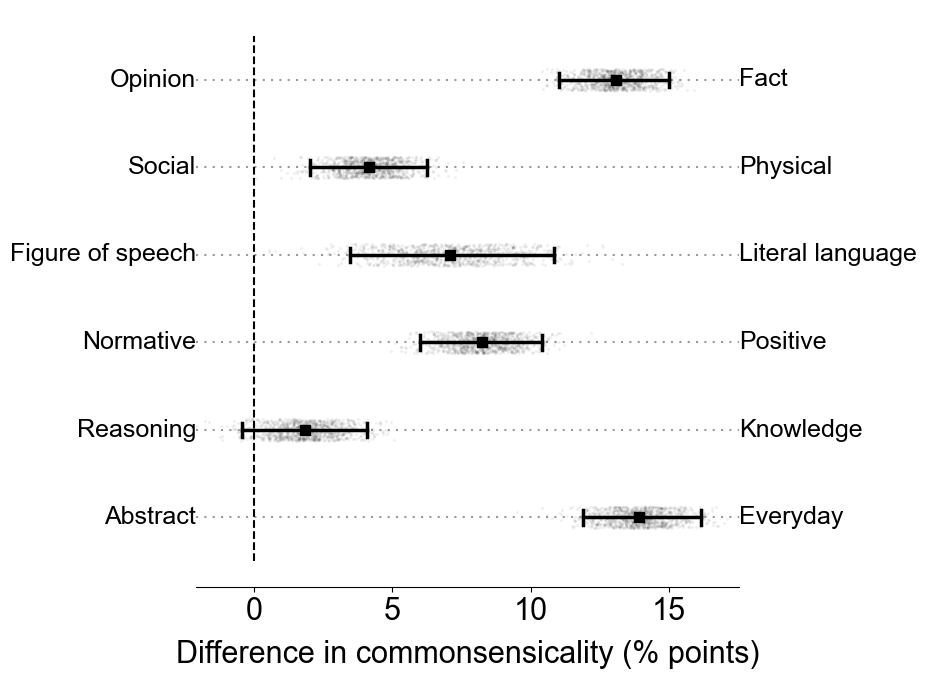

In [414]:
fig, ax = plt.subplots(1, 1, figsize=(7, 7.5))

plot_diff_by_dim(ax)

plt.show()

#### Compare this result with MTurk study

In [402]:
# Human ratings
# Do you agree with this statement
mturk_individual = pd.read_csv("~/dev/commonsense-lm/llm_rating_trials/data/results/individual_ratings.csv", index_col=0)

# Do you think most people would agree with this statement?
mturk_group = pd.read_csv("~/dev/commonsense-lm/llm_rating_trials/data/results/group_ratings.csv", index_col=0)

mturk_statements = pd.read_csv("~/dev/commonsense-lm/llm_rating_trials/data/statements_and_prompts.csv")

# Majority voting (skip participants who didn't answer)
mturk_avg_vote_per_q = mturk_individual.mean(axis=1, skipna=True)
mturk_maj_i = (mturk_avg_vote_per_q >= 0.5).astype(int)

# Majority of "others agree" answers by humans
maj_others = (mturk_group.mean(1, skipna=True) >= 0.5).astype(int)

# Statement: consensus
mturk_c_i = 2 * np.abs(mturk_individual.mean(1) - 0.5)

# Statement: awareness
mturk_a_i = pd.Series([(mturk_group.loc[i].dropna().astype(int) == mturk_maj_i[i]).mean()
                 for i in mturk_maj_i.index],
                index=mturk_maj_i.index)

# Statement: commonsensicality
mturk_m_i = np.sqrt(mturk_c_i * mturk_a_i)

mturk_statement_comm_all = pd.DataFrame(
    [], columns=["consensus", "awareness", "commonsensicality"],
    index=["Humans"])
mturk_statement_comm_all.loc["Humans", "consensus"] = np.array(mturk_c_i) * 100
mturk_statement_comm_all.loc["Humans", "awareness"] = np.array(mturk_a_i) * 100
mturk_statement_comm_all.loc["Humans", "commonsensicality"] = np.array(mturk_m_i) * 100

In [403]:
dims = ["behavior", "everyday", "figure_of_speech", "judgment", "opinion", "reasoning"]

mturk_diff_by_dim_humans = pd.DataFrame(columns=["data", "median"])

@njit(parallel=True)
def bootstrap(vals, dim, n_boots=1000):
    diff = np.zeros(n_boots, dtype=float)
#     # standardize
#     vals = vals / np.std(vals)
    for i in range(n_boots):
        idx = np.random.choice(np.arange(vals.shape[0]), len(vals))
        val_pos = vals[idx][dim[idx] == 1]
        val_neg = vals[idx][dim[idx] == 0]
        diff[i] = val_pos.mean() - val_neg.mean()
    return diff

for i, dim in enumerate(dims):
    if dim == "behavior":
        dim_ = "Physical\n - Social"
    elif dim == "everyday":
        dim_ = "Everyday\n - Abstract"
    elif dim == "figure_of_speech":
        dim_ = "Literal language\n - Figure of speech"
    elif dim == "judgment":
        dim_ = "Positive\n - Normative"
    elif dim == "opinion":
        dim_ = "Fact\n - Opinion"
    elif dim == "reasoning":
        dim_ = "Knowledge\n - Reasoning"
        
    # Humans
    human = mturk_statement_comm_all.loc["Humans", "commonsensicality"]
    if dim == "everyday":
        mturk_diff_humans = bootstrap(human, mturk_statements[dim].to_numpy())
    else:
        mturk_diff_humans = bootstrap(human, (1 - mturk_statements[dim]).to_numpy())
    
    mturk_diff_by_dim_humans.loc[dim_, "data"] = mturk_diff_humans
    mturk_diff_by_dim_humans.loc[dim_, "median"] = mturk_diff_humans.mean()


mturk_diff_by_dim_humans = mturk_diff_by_dim_humans.sort_values("median", ascending=True)

In [404]:
mturk_diff_by_dim_humans

,data,median
Everyday\n - Abstract,"[3.3680088526180896, 5.340944817968769, 5.4459...",4.86149
Knowledge\n - Reasoning,"[6.169770973050724, 6.766040605851586, 6.88001...",6.637648
Positive\n - Normative,"[8.154503334296969, 8.336329873592334, 8.08047...",7.114396
Literal language\n - Figure of speech,"[8.874481919612656, 8.935128457432867, 7.19529...",7.233234
Physical\n - Social,"[7.073296416840719, 7.655153642961601, 8.44325...",7.624089
Fact\n - Opinion,"[9.35441205372095, 9.734322043994077, 10.15133...",9.346039


In [503]:
from matplotlib import patches
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

def plot_diff_by_dim_comparison(ax):
    xmin = -0.0001
    xmax = 0.00001

    legends = []

    # MTurk
    for i, dim in zip(np.arange(0, len(mturk_diff_by_dim_humans) * 1.2, 1.2), mturk_diff_by_dim_humans.index):

        diff = mturk_diff_by_dim_humans.loc[dim, "data"]
        # print(diff)
        yvals = np.array([i] * len(diff), dtype=float)
        yvals += np.random.rand(yvals.shape[0]) * 0.3 - 0.15
        # ax.scatter(diff, yvals, color="black", alpha=0.04, s=2)
        xmin = min(xmin, diff.min())
        xmax = max(xmax, diff.max())

        # Indicate mean
        mean = diff.mean()
        ci_thickness = 0.1
        lo, hi = np.percentile(diff, q=2.5), np.percentile(diff, q=97.5)
        ax.scatter([mean], [i + 0.15], color="k", alpha=1, marker="o", s=100)
        ax.plot([lo, hi], [i + 0.15, i + 0.15],  color="k", linewidth=2.5, alpha=1)

    legends.append(Line2D([0], [0], marker="o", color="k", markerfacecolor="k", 
                          markersize=10, alpha=1, label="MTurk", linewidth=2))

    # Platform
    for i, dim in zip(np.arange(0, len(diff_by_dim_humans) * 1.2, 1.2), diff_by_dim_humans.index):

        diff = diff_by_dim_humans.loc[dim, "data"]
        # print(diff)
        yvals = np.array([i] * len(diff), dtype=float)
        yvals += np.random.rand(yvals.shape[0]) * 0.3 - 0.15
        # ax.scatter(diff, yvals, color="black", alpha=0.04, s=2)
        xmin = min(xmin, diff.min())
        xmax = max(xmax, diff.max())

        # Indicate mean
        mean = diff.mean()
        ci_thickness = 0.1
        lo, hi = np.percentile(diff, q=2.5), np.percentile(diff, q=97.5)
        ax.scatter([mean], [i - 0.15], color="red", marker="X", s=100, alpha=1)
        ax.plot([lo, hi], [i - 0.15, i - 0.15],  color="red", linewidth=2.5, alpha=1)
    
    legends.append(Line2D([0], [0], marker="X", color="red", markerfacecolor="red", 
                          markersize=8, alpha=1, label="Platform", linewidth=2))

    for j, (i, dim) in enumerate(zip(np.arange(0, len(mturk_diff_by_dim_humans) * 1.2, 1.2), mturk_diff_by_dim_humans.index)):
        text_right, text_left = dim.split("\n - ")
        ax.text(x=xmin, y=i, s=text_left, ha="right", va="center", size=18, color="k",)
        ax.text(x=xmax, y=i, s=text_right, ha="left", va="center", size=18, color="k",)
        offset=1.2
        if j % 2 == 0:
            ax.fill_between([xmin, xmax], [i-offset / 2, i-offset/2], [i+offset / 2, i+offset/2],
                            color="k", alpha=0.03)        

    ax.set_yticks([])
    ax.set_xlim([xmin, xmax])

    ax.tick_params(axis="y", length=0)
    ax.tick_params(axis="x", which='major', labelsize=22)
    sns.despine(ax=ax, top=True, left=True, right=True, bottom=False)
    ax.set_xlabel("Difference in commonsensicality (% points)", size=22,
                  labelpad=10)
    [line.set_zorder(3) for line in ax.lines]

    # ax.set_ylim(-0.8, 5.5)
    ax.tick_params(axis='y', which='major', labelsize=20)
    ax.plot([0, 0], [-0.6, 6.6], color="k", linestyle="--")

    legend = ax.legend(handles=list(legends),#list(legends_new)[::-1], 
              ncol=2, bbox_to_anchor=(0.5, 1.05), fontsize=18,
              labelcolor="markerfacecolor", frameon=True, numpoints=1, loc="center")
    
    for text in legend.get_texts():
        text.set_color("black")

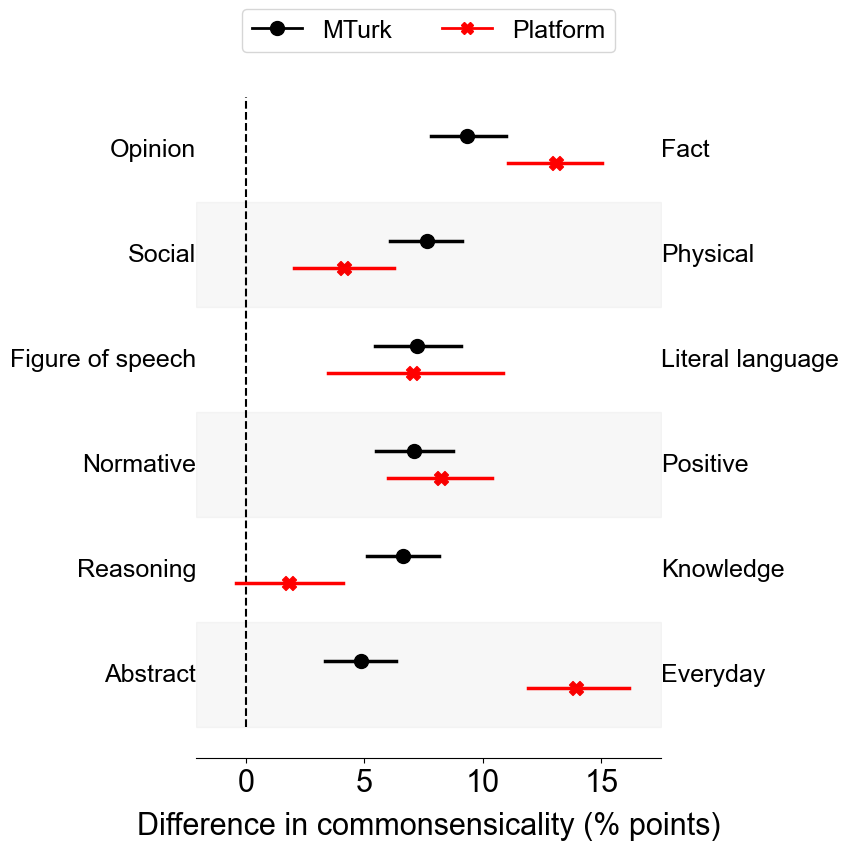

In [507]:
fig, ax = plt.subplots(1, 1, figsize=(6, 9))

plot_diff_by_dim_comparison(ax)

plt.savefig("figures/descriptives/statement_comm_features_diff_comparison.png", bbox_inches="tight", dpi=100)

plt.show()

## Human features

In [521]:
def find_first_non_nan(series):
    return series.dropna().iloc[0]

df_inidivial_pivoted = df_individuals.pivot_table(
    index="userSessionId",
    columns="informationType",
    values="experimentInfo",
    aggfunc="first"
)

In [524]:
df_filtered = df_inidivial_pivoted[
    (~df_inidivial_pivoted["demographics"].isnull())
     & df_inidivial_pivoted["demographicsLongInternational"].isnull()
]

In [549]:
df_filtered

informationType,CRT,demographics,demographicsLongInternational,rmeTen,country_reside
userSessionId,,,,,
--DFgs8r4F60lIiv1tekONyjYDtovVbX,NaN,"{""surveySource"":""@watts-lab/surveys"",""version""...",NaN,NaN,United States
--_2vEtangOrMf2YKrY60iTGRQ1FXY6S,NaN,"{""surveySource"":""@watts-lab/surveys"",""version""...",NaN,NaN,United Kingdom
--cjEE2fLzTNZk1W9fb51r4mShjjOrlM,"{""surveySource"":""@watts-lab/surveys"",""version""...","{""surveySource"":""@watts-lab/surveys"",""version""...",NaN,"{""surveySource"":""@watts-lab/surveys"",""version""...",United States
--gV1N5-oO9YuXOCzsnTfGd1-7Nepndg,NaN,"{""surveySource"":""@watts-lab/surveys"",""version""...",NaN,NaN,United States
--iaiy0MZX9wO0UKrZqE3Yzg1j3WNOra,NaN,"{""surveySource"":""@watts-lab/surveys"",""version""...",NaN,NaN,United States
...,...,...,...,...,...
zz5fQdz3eh-o6zgIFwXLLLo0vE_wMISn,NaN,"{""surveySource"":""@watts-lab/surveys"",""version""...",NaN,NaN,United Kingdom
zzLq3IIO0LTiWuKREUCQwrX2MwNAlY_w,NaN,"{""surveySource"":""@watts-lab/surveys"",""version""...",NaN,NaN,Australia
zzMhO2TFZtnb5QgPkHOJZWKQoUCRsMVJ,"{""surveySource"":""@watts-lab/surveys"",""version""...","{""surveySource"":""@watts-lab/surveys"",""version""...",NaN,"{""surveySource"":""@watts-lab/surveys"",""version""...",United Kingdom


### Country of residence

In [739]:
import ast

df_filtered["country_reside"] = df_filtered["demographics"].map(lambda x: ast.literal_eval(x)["responses"]["country_reside"])

/var/folders/w9/pp37d7zx5tj0x5_2k8t1x7tr0000gn/T/ipykernel_9065/815643055.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["country_reside"] = df_filtered["demographics"].map(lambda x: ast.literal_eval(x)["responses"]["country_reside"])


In [740]:
individual_comm_with_demo = individual_comm.merge(df_filtered, left_index=True, right_index=True)
individual_comm_with_demo

,C_j,A_j,M_j,CRT,demographics,demographicsLongInternational,rmeTen,country_reside
--cjEE2fLzTNZk1W9fb51r4mShjjOrlM,0.800000,0.800000,0.800000,"{""surveySource"":""@watts-lab/surveys"",""version""...","{""surveySource"":""@watts-lab/surveys"",""version""...",NaN,"{""surveySource"":""@watts-lab/surveys"",""version""...",United States
-06VS2WSg_MQ14jJiTsxJ4eF_gZi2brG,0.666667,0.866667,0.760117,"{""surveySource"":""@watts-lab/surveys"",""version""...","{""surveySource"":""@watts-lab/surveys"",""version""...",NaN,"{""surveySource"":""@watts-lab/surveys"",""version""...",Thailand
-0O7hNsOtopBlHiKbo2tJSqwey-DIl0J,0.866667,0.933333,0.899383,"{""surveySource"":""@watts-lab/surveys"",""version""...","{""surveySource"":""@watts-lab/surveys"",""version""...",NaN,"{""surveySource"":""@watts-lab/surveys"",""version""...",United Kingdom
-0i3xVwYtAOvW7OQSwZcag5X5rBiOQO5,1.000000,0.733333,0.856349,"{""surveySource"":""@watts-lab/surveys"",""version""...","{""surveySource"":""@watts-lab/surveys"",""version""...",NaN,"{""surveySource"":""@watts-lab/surveys"",""version""...",United Kingdom
-2Vtg8wGzhpTr39JcdhPPyc2WcfOcHWG,0.400000,0.800000,0.565685,"{""surveySource"":""@watts-lab/surveys"",""version""...","{""surveySource"":""@watts-lab/surveys"",""version""...",NaN,"{""surveySource"":""@watts-lab/surveys"",""version""...",United Kingdom
...,...,...,...,...,...,...,...,...
zxL2gREUQrsHXa1HJL_uOJ5Xu9eeWSRN,0.733333,0.733333,0.733333,"{""surveySource"":""@watts-lab/surveys"",""version""...","{""surveySource"":""@watts-lab/surveys"",""version""...",NaN,"{""surveySource"":""@watts-lab/surveys"",""version""...",United Kingdom
zxiKBopbmJAkAnRxz6gTj0EwYd-3rm8x,0.733333,0.600000,0.663325,"{""surveySource"":""@watts-lab/surveys"",""version""...","{""surveySource"":""@watts-lab/surveys"",""version""...",NaN,"{""surveySource"":""@watts-lab/surveys"",""version""...",United Kingdom
zybIBXVUSlyQTZcKH_JkhpFRaty2qv4z,0.666667,0.866667,0.760117,"{""surveySource"":""@watts-lab/surveys"",""version""...","{""surveySource"":""@watts-lab/surveys"",""version""...",NaN,"{""surveySource"":""@watts-lab/surveys"",""version""...",Slovenia
zzMhO2TFZtnb5QgPkHOJZWKQoUCRsMVJ,0.600000,0.533333,0.565685,"{""surveySource"":""@watts-lab/surveys"",""version""...","{""surveySource"":""@watts-lab/surveys"",""version""...",NaN,"{""surveySource"":""@watts-lab/surveys"",""version""...",United Kingdom


In [741]:
gb = individual_comm_with_demo.drop(columns=["CRT", "demographics", "rmeTen"]).groupby("country_reside")

import numpy as np
import scipy.stats

def custom_mean(data):
    return np.mean(data * 100)

def custom_sd(data):
    return np.std(data * 100)

def mean_confidence_interval(data, confidence=0.95):
    if len(data) <= 1:
        return "N/A"
    data *= 100
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    lo = max(m - h, 0)
    hi = min(m + h, 100)
    return f"[{lo:.2f}, {hi:.2f}]"

df = pd.DataFrame(0, index=gb.count().index, columns=["N", "Mean $M_j$", "95% CI"])
df["N"] = gb.count()["M_j"]
df["Mean $M_j$"] = gb.agg([custom_mean])["M_j"]
df["95% CI"] = gb.agg([mean_confidence_interval])["M_j"]

In [742]:
df = df[df.N >= 10].sort_values("Mean $M_j$", ascending=True)
df_country = df.reset_index()
df_country.loc[df_country["country_reside"] == "item1", "country_reside"] = "Other"

import ast
df_country["CI lo"] = 0.
df_country["CI hi"] = 0.
for i, row in df_country.iterrows():
    lo, hi = ast.literal_eval(row["95% CI"])
    df_country.loc[i, "CI lo"] = lo
    df_country.loc[i, "CI hi"] = hi

df_country

,country_reside,N,Mean $M_j$,95% CI,CI lo,CI hi
0,Switzerland,18,70.760202,"[64.77, 76.75]",64.77,76.75
1,Ireland,46,72.266300,"[68.84, 75.70]",68.84,75.70
2,Other,10,73.513949,"[64.27, 82.75]",64.27,82.75
3,Netherlands,36,73.680969,"[69.70, 77.66]",69.70,77.66
4,New Zealand,47,73.867940,"[70.89, 76.85]",70.89,76.85
5,Germany,54,75.098186,"[71.62, 78.58]",71.62,78.58
6,Indonesia,12,75.133405,"[65.01, 85.25]",65.01,85.25
7,India,138,75.336366,"[73.03, 77.65]",73.03,77.65
8,Singapore,23,76.052397,"[71.21, 80.90]",71.21,80.90
9,France,56,76.410851,"[72.73, 80.10]",72.73,80.10


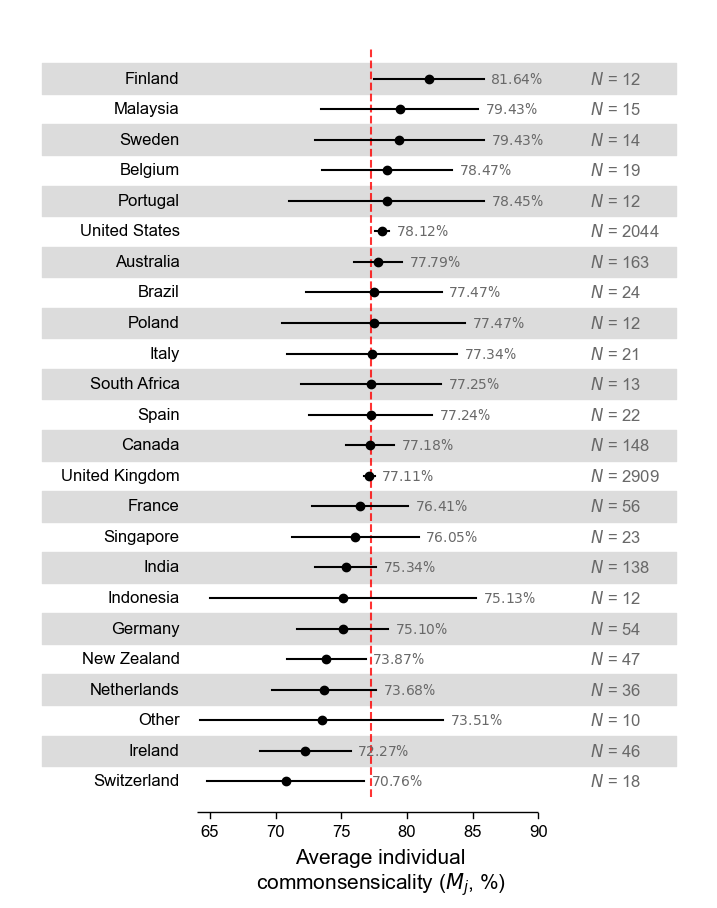

In [743]:
fig, ax = plt.subplots(1, 1, figsize=(9, 11))

for i, row in df_country.iterrows():
    m, lo, hi = row["Mean $M_j$"], row["CI lo"], row["CI hi"]
    ax.scatter([m], [i], color="k", zorder=2)
    ax.plot([lo, hi], [i, i], color="k", zorder=2)
    ax.text(x=hi + 0.5, y=i, s=f"${m:.2f}$%", va="center", ha="left", size=10, color="dimgrey", zorder=4)
    N = row["N"]
    

x_lo, x_hi = ax.get_xlim()
features_pos = np.array([x_lo - 20 * i for i in range(6)])[::-1]
features_pos -= 10

for i, row in df_country.iterrows():
    m, lo, hi = row["Mean $M_j$"], row["CI lo"], row["CI hi"]
    N = row["N"]
    if i % 2 == 1:
        ax.fill_between(x=[x_lo-11, x_hi + 13.5], y1=i-0.5, y2=i+0.5, color="gainsboro", zorder=0)
    country = row["country_reside"]
    ax.text(x=x_lo - 0.5, y=i, s=country, va="center", ha="right", size=12, color="black")
    ax.text(x=x_hi + 7, y=i, s=f"$N$ = {N}", va="center", ha="left", size=12, color="dimgrey")

ax.plot([individual_comm_with_demo["M_j"].mean() * 100, individual_comm_with_demo["M_j"].mean() * 100],
        [-0.5, len(df_country)],
        zorder=1, color="red", linestyle="--", alpha=0.8)


ax.set_yticks([]); ax.set_xticks([])
sns.despine(left=True, bottom=False)

# Move y-axis (left spine) to x=0
# ax.spines['left'].set_position(('data', 0))

# Hide the bottom spine
ax.spines['bottom'].set_visible(False)

# Draw a new x-axis line starting at x=0
ymin, ymax = ax.get_ylim()
ax.hlines(y=-1, xmin=64, xmax=90, color='black', linewidth=1)



for i in range(65, 91, 5):
    ax.plot([i, i], [-1.02, -1.2], color="k", linewidth=1)
    ax.text(x=i, y=-1.4, s=i, ha="center", va="top", size=12)
    
ax.text(x=(91 + 65) /2, y=-2.2, s="Average individual\ncommonsensicality ($M_j$, %)", size=15, ha="center", va="top")

plt.savefig("figures/descriptives/avg_individual_comm_country.png", bbox_inches="tight", dpi=120)

In [744]:
individual_comm_with_demo

,C_j,A_j,M_j,CRT,demographics,demographicsLongInternational,rmeTen,country_reside
--cjEE2fLzTNZk1W9fb51r4mShjjOrlM,0.800000,0.800000,0.800000,"{""surveySource"":""@watts-lab/surveys"",""version""...","{""surveySource"":""@watts-lab/surveys"",""version""...",NaN,"{""surveySource"":""@watts-lab/surveys"",""version""...",United States
-06VS2WSg_MQ14jJiTsxJ4eF_gZi2brG,0.666667,0.866667,0.760117,"{""surveySource"":""@watts-lab/surveys"",""version""...","{""surveySource"":""@watts-lab/surveys"",""version""...",NaN,"{""surveySource"":""@watts-lab/surveys"",""version""...",Thailand
-0O7hNsOtopBlHiKbo2tJSqwey-DIl0J,0.866667,0.933333,0.899383,"{""surveySource"":""@watts-lab/surveys"",""version""...","{""surveySource"":""@watts-lab/surveys"",""version""...",NaN,"{""surveySource"":""@watts-lab/surveys"",""version""...",United Kingdom
-0i3xVwYtAOvW7OQSwZcag5X5rBiOQO5,1.000000,0.733333,0.856349,"{""surveySource"":""@watts-lab/surveys"",""version""...","{""surveySource"":""@watts-lab/surveys"",""version""...",NaN,"{""surveySource"":""@watts-lab/surveys"",""version""...",United Kingdom
-2Vtg8wGzhpTr39JcdhPPyc2WcfOcHWG,0.400000,0.800000,0.565685,"{""surveySource"":""@watts-lab/surveys"",""version""...","{""surveySource"":""@watts-lab/surveys"",""version""...",NaN,"{""surveySource"":""@watts-lab/surveys"",""version""...",United Kingdom
...,...,...,...,...,...,...,...,...
zxL2gREUQrsHXa1HJL_uOJ5Xu9eeWSRN,0.733333,0.733333,0.733333,"{""surveySource"":""@watts-lab/surveys"",""version""...","{""surveySource"":""@watts-lab/surveys"",""version""...",NaN,"{""surveySource"":""@watts-lab/surveys"",""version""...",United Kingdom
zxiKBopbmJAkAnRxz6gTj0EwYd-3rm8x,0.733333,0.600000,0.663325,"{""surveySource"":""@watts-lab/surveys"",""version""...","{""surveySource"":""@watts-lab/surveys"",""version""...",NaN,"{""surveySource"":""@watts-lab/surveys"",""version""...",United Kingdom
zybIBXVUSlyQTZcKH_JkhpFRaty2qv4z,0.666667,0.866667,0.760117,"{""surveySource"":""@watts-lab/surveys"",""version""...","{""surveySource"":""@watts-lab/surveys"",""version""...",NaN,"{""surveySource"":""@watts-lab/surveys"",""version""...",Slovenia
zzMhO2TFZtnb5QgPkHOJZWKQoUCRsMVJ,0.600000,0.533333,0.565685,"{""surveySource"":""@watts-lab/surveys"",""version""...","{""surveySource"":""@watts-lab/surveys"",""version""...",NaN,"{""surveySource"":""@watts-lab/surveys"",""version""...",United Kingdom


In [745]:
individual_comm_org

,C_j,A_j,M_j
0,0.82,0.84,0.829940
1,0.76,0.80,0.779744
2,0.72,0.74,0.729932
3,0.66,0.66,0.660000
4,0.76,0.82,0.789430
...,...,...,...
2041,0.82,0.78,0.799750
2042,0.86,0.82,0.839762
2043,0.64,0.62,0.629921
2044,0.82,0.78,0.799750


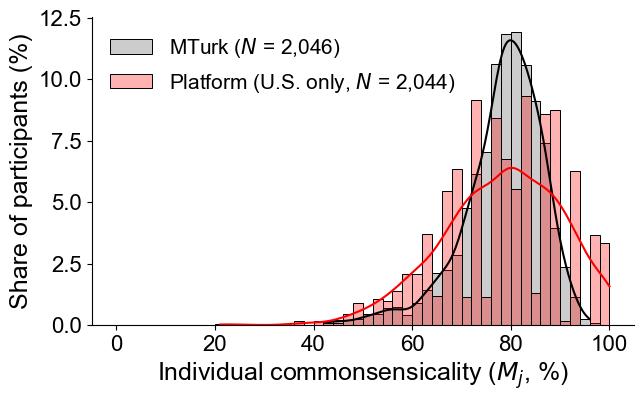

In [746]:
fig, ax = plt.subplots(1, 1, figsize=(7, 4))

sns.histplot(individual_comm_org["M_j"] * 100, bins=np.arange(0, 101, 2), kde=True, stat="percent", color="black", 
             alpha=0.2, label=f"MTurk ($N$ = {individual_comm_org.shape[0]:,})", line_kws=dict(lw=1.5))
individual_comm_with_demo_us = individual_comm_with_demo[individual_comm_with_demo.country_reside == "United States"]
sns.histplot(individual_comm_with_demo_us["M_j"] * 100, bins=np.arange(0, 101, 2), kde=True, stat="percent", ax=ax, color="red", 
             alpha=0.3, label=f"Platform (U.S. only, $N$ = {individual_comm_with_demo_us.shape[0]:,})",  line_kws=dict(lw=1.5))

ax.tick_params(axis="both", which="major", labelsize=16)
ax.set_xlabel("Individual commonsensicality ($M_j$, %)", size=18)
ax.set_ylabel("Share of participants (%)", size=18)

sns.despine(ax=ax)

ax.legend(frameon=False, fontsize=15)

plt.savefig("figures/descriptives/individual_commonsensicality_comparison_us_only.png", bbox_inches="tight", dpi=120)

In [750]:
individual_comm_comparison = pd.concat([(individual_comm_org["M_j"] * 100).describe(), (individual_comm_with_demo_us["M_j"] * 100).describe()], axis=1)
individual_comm_comparison.columns = ["MTurk", "Platform (U.S. only)"]
print(individual_comm_comparison.round(2).to_markdown())

|       |   MTurk |   Platform (U.S. only) |
|:------|--------:|-----------------------:|
| count | 2046    |                2044    |
| mean  |   78.39 |                  78.12 |
| std   |    8.13 |                  12.11 |
| min   |   42.33 |                  21.08 |
| 25%   |   74.46 |                  69.92 |
| 50%   |   79.43 |                  79.72 |
| 75%   |   83.98 |                  86.67 |
| max   |   96    |                 100    |


In [751]:
from scipy.stats import mannwhitneyu

sample2 = individual_comm_org["M_j"] * 100
sample1 = individual_comm_with_demo_us["M_j"] * 100

# sample1 and sample2 are your data arrays
stat, p = mannwhitneyu(sample1, sample2, alternative='two-sided')
print(f"Statistic: {stat}, p-value: {p}")
print("AUC = ", stat / (sample1.shape[0] * sample2.shape[0]))

Statistic: 2091041.5, p-value: 0.9993871114218491
AUC =  0.5000070540006466


In [754]:
from scipy.stats import ttest_ind

stat, p = ttest_ind(sample1, sample2, equal_var=False)
print(f"Statistic: {stat}, p-value: {p}")

mean1, mean2 = np.mean(sample1), np.mean(sample2)
std1, std2 = np.std(sample1, ddof=1), np.std(sample2, ddof=1)
n1, n2 = len(sample1), len(sample2)

# Pooled standard deviation
s_pooled = np.sqrt(((n1 - 1)*std1**2 + (n2 - 1)*std2**2) / (n1 + n2 - 2))

# Cohen's d
cohens_d = (mean1 - mean2) / s_pooled
print(f"Cohen's d: {cohens_d}")

Statistic: -0.8240368558079474, p-value: 0.40997361496173057
Cohen's d: -0.02577480940430042


In [801]:
def one_hot_encode_with_reference(df, column, reference_class):
    """
    One-hot encodes a column in a pandas DataFrame with a specified reference class.

    Args:
        df (pd.DataFrame): The input DataFrame.
        column (str): The name of the column to one-hot encode.
        reference_class: The value in the column to use as the reference class.

    Returns:
        pd.DataFrame: The DataFrame with the one-hot encoded columns and the original column dropped.
    """
    
    # Create dummy variables, dropping the reference class
    dummies = pd.get_dummies(df[column], prefix=None, drop_first=False).astype(int)
    dummies = dummies.drop(columns=[f"{reference_class}"])
    columns = dummies.columns

    # Concatenate the dummy variables with the original DataFrame
    df = pd.concat([df, dummies], axis=1)

    # Drop the original column
    df = df.drop(column, axis=1)

    return df, columns

df, columns = one_hot_encode_with_reference(individual_comm_with_demo, 'country_reside', 'United States')

In [803]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

regression_df = df.copy(deep=True)
md = sm.GLM(regression_df["M_j"] * 100, 
            regression_df[columns],
            family=sm.families.Gaussian())
res = md.fit()

In [804]:
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                    M_j   No. Observations:                 6066
Model:                            GLM   Df Residuals:                     5975
Model Family:                Gaussian   Df Model:                           90
Link Function:               Identity   Scale:                          2230.2
Method:                          IRLS   Log-Likelihood:                -31945.
Date:                Tue, 20 May 2025   Deviance:                   1.3326e+07
Time:                        16:00:36   Pearson chi2:                 1.33e+07
No. Iterations:                     3   Pseudo R-squ. (CS):             -1.511
Covariance Type:            nonrobust                                         
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Afghanis

## Design point analysis

### Number of statements per design point

In [554]:
properties_wide = df_properties.pivot(index="statementId", columns="name", values="available")

properties_wide.rename(columns={
    "behavior": "physical",
    "everyday": "everyday",
    "figure_of_speech": "literal language",
    "judgment": "positive",
    "opinion": "fact",
    "reasoning": "knowledge"
}, inplace=True)

for dim in properties_wide.columns:
    if dim != "everyday":
        properties_wide[dim] = 1 - properties_wide[dim]

# Reorder columns
properties_wide = properties_wide[["fact", "physical", "literal language", "positive", "knowledge", "everyday"]]

In [555]:
# Count number of statements with each 6-fold design point
design_point_counts = properties_wide.groupby(
    by=["fact", "physical", "literal language", "positive", "knowledge", "everyday"],
).size()

# Find find design points with no statements
for i in range(2**6):
    design_point = tuple(int(x) for x in np.binary_repr(i, width=6))
    if design_point not in design_point_counts.index:
        design_point_counts.loc[design_point] = 0

# Don't share rows
design_point_counts = design_point_counts.reset_index()
design_point_counts.index = [int("".join(x.loc[["fact", "physical", "literal language", "positive", "knowledge", "everyday"]].astype(str).to_numpy()), 2)
                             for _, x in design_point_counts.iterrows()]
design_point_counts.index.name = "design_point_id"
design_point_counts.rename(columns={0: "count"}, inplace=True)

In [556]:
design_point_counts

,fact,physical,literal language,positive,knowledge,everyday,count
design_point_id,,,,,,,
0,0,0,0,0,0,0,297
1,0,0,0,0,0,1,236
2,0,0,0,0,1,0,231
3,0,0,0,0,1,1,132
4,0,0,0,1,0,0,54
...,...,...,...,...,...,...,...
60,1,1,1,1,0,0,343
61,1,1,1,1,0,1,258
62,1,1,1,1,1,0,177


In [557]:
design_point_counts.sort_values(by="count", ascending=True)

,fact,physical,literal language,positive,knowledge,everyday,count
design_point_id,,,,,,,
38,1,0,0,1,1,0,0
54,1,1,0,1,1,0,10
55,1,1,0,1,1,1,14
21,0,1,0,1,0,1,16
23,0,1,0,1,1,1,16
...,...,...,...,...,...,...,...
8,0,0,1,0,0,0,575
10,0,0,1,0,1,0,646
63,1,1,1,1,1,1,791


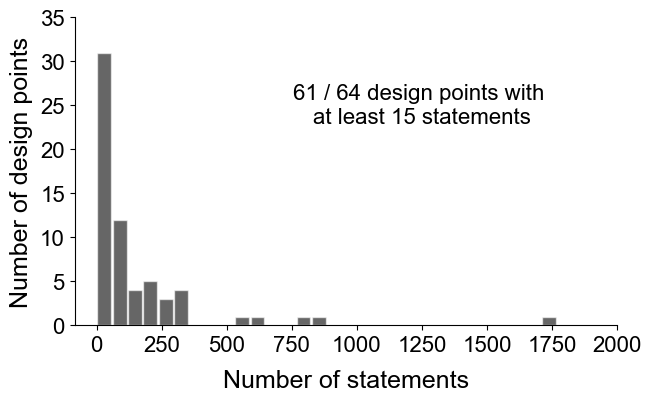

In [558]:
# Histogram of design point counts
fig, ax = plt.subplots(1, 1, figsize=(7, 4))
ax.hist(design_point_counts["count"], bins=30, color="black", alpha=0.6,
        rwidth=0.9, edgecolor="white")
ax.set_xlabel("Number of statements", size=18, labelpad=10)
ax.set_ylabel("Number of design points", size=18, labelpad=5)
ax.tick_params(axis="both", which="major", labelsize=16)
sns.despine(ax=ax, top=True, left=False, right=True, bottom=False)
ax.set_xticks([0, 250, 500, 750, 1000, 1250, 1500, 1750, 2000])
ax.set_yticks([0, 5, 10, 15, 20, 25, 30, 35])

threshold = 15
num_design_points_with_at_least_threshold = sum(design_point_counts["count"] >= threshold)
ax.text(x=1250, y=25, s=f"{num_design_points_with_at_least_threshold} / {len(design_point_counts["count"])} design points with \nat least {threshold} statements", size=16, va="center", ha="center")

ax.text

plt.show()

### Mapping statements to design points

In [559]:
properties_wide["design_point_id"] = properties_wide[["fact", "physical", "literal language", "positive", "knowledge", "everyday"]].apply(lambda x: "".join(str(int(xi)) for xi in x), axis=1)
properties_wide["design_point_id"] = properties_wide["design_point_id"].map(lambda x: int(x, base=2))
properties_wide

name,fact,physical,literal language,positive,knowledge,everyday,design_point_id
statementId,,,,,,,
1,1,1,1,1,0,1,61
2,1,1,1,1,1,0,62
3,1,0,1,0,0,1,41
4,1,1,1,1,1,1,63
5,0,1,1,0,1,1,27
...,...,...,...,...,...,...,...
10121,1,1,1,1,1,1,63
10122,0,1,1,0,0,1,25
10123,1,1,1,1,1,1,63


In [560]:
num_annotations_per_statement

statementId
1          2
2          1
4          1
5          3
6        167
        ... 
10121     65
10122     72
10123     67
10124     60
10125     69
Name: I_agree, Length: 2896, dtype: int64

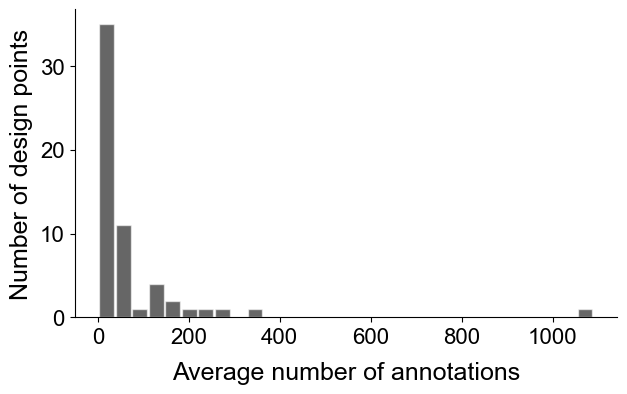

In [561]:
properties_wide_with_annotations = properties_wide.join(num_annotations_per_statement, how="right")
avg_num_annots_per_design_point = properties_wide_with_annotations.groupby("design_point_id").mean()["I_agree"]

# Histogram of design point counts
fig, ax = plt.subplots(1, 1, figsize=(7, 4))
ax.hist(avg_num_annots_per_design_point.values, bins=30, color="black", alpha=0.6,
        rwidth=0.9, edgecolor="white")
ax.set_xlabel("Average number of annotations", size=18, labelpad=10)
ax.set_ylabel("Number of design points", size=18, labelpad=5)
ax.tick_params(axis="both", which="major", labelsize=16)
sns.despine(ax=ax, top=True, left=False, right=True, bottom=False)
# ax.set_xticks([0, 250, 500, 750, 1000, 1250, 1500, 1750, 2000])
# ax.set_yticks([0, 5, 10, 15, 20, 25, 30, 35])

# threshold = 15
# num_design_points_with_at_least_threshold = sum(design_point_counts["count"] >= threshold)
# ax.text(x=1250, y=25, s=f"{num_design_points_with_at_least_threshold} / {len(design_point_counts["count"])} design points with \nat least {threshold} statements", size=16, va="center", ha="center")

ax.text

plt.show()

In [562]:
properties_wide_with_annotations["at_least_1"] = (properties_wide_with_annotations["I_agree"] >= 1).astype(int)
properties_wide_with_annotations["at_least_100"] = (properties_wide_with_annotations["I_agree"] >= 100).astype(int)

at_least_1 = properties_wide_with_annotations.groupby("design_point_id").sum()["at_least_1"]
at_least_100 = properties_wide_with_annotations.groupby("design_point_id").sum()["at_least_100"]

In [563]:
at_least_1

design_point_id
0      57
1      68
2      56
3      37
5       4
6       3
7       3
8     178
9     228
10    336
11    220
12      4
13      7
14      6
15      8
16      7
17      1
18      5
19      1
20      2
21      1
22      2
23      2
24      9
25      8
26    136
27     77
28     40
29      7
30     37
31     14
32      1
33      4
34      3
35      1
39      2
40      5
41     63
42     20
43    130
44      3
45     39
46      5
47     19
48      2
49      3
51      4
52      3
53      4
55      2
56     19
57     40
58     34
59    141
60     81
61     85
62    100
63    519
Name: at_least_1, dtype: int64

In [564]:
design_point_df = design_point_counts.copy(deep=True)
design_point_df.loc[at_least_1.index, "N (>= 1)"] = at_least_1
design_point_df["N (>= 1)"] = design_point_df["N (>= 1)"].fillna(0).astype(int)
design_point_df["N (>= 1)"] = [f"{n} ({100 * n / N:.1f})" if N > 0 else f"{n} (N/A)" 
                               for n, N in zip(design_point_df["N (>= 1)"], design_point_df["count"])]

design_point_df.loc[at_least_1.index, "N (>= 100)"] = at_least_100
design_point_df["N (>= 100)"] = design_point_df["N (>= 100)"].fillna(0).astype(int)
design_point_df["N (>= 100)"] = [f"{n} ({100 * n / N:.1f})" if N > 0 else f"{n} (N/A)" 
                               for n, N in zip(design_point_df["N (>= 100)"], design_point_df["count"])]

design_point_df

,fact,physical,literal language,positive,knowledge,everyday,count,N (>= 1),N (>= 100)
design_point_id,,,,,,,,,
0,0,0,0,0,0,0,297,57 (19.2),0 (0.0)
1,0,0,0,0,0,1,236,68 (28.8),0 (0.0)
2,0,0,0,0,1,0,231,56 (24.2),0 (0.0)
3,0,0,0,0,1,1,132,37 (28.0),1 (0.8)
4,0,0,0,1,0,0,54,0 (0.0),0 (0.0)
...,...,...,...,...,...,...,...,...,...
60,1,1,1,1,0,0,343,81 (23.6),0 (0.0)
61,1,1,1,1,0,1,258,85 (32.9),1 (0.4)
62,1,1,1,1,1,0,177,100 (56.5),15 (8.5)


In [565]:
print(design_point_df.round(2).sort_values(by="count", ascending=False).to_markdown(index=False))

|   fact |   physical |   literal language |   positive |   knowledge |   everyday |   count | N (>= 1)   | N (>= 100)   |
|-------:|-----------:|-------------------:|-----------:|------------:|-----------:|--------:|:-----------|:-------------|
|      0 |          0 |                  1 |          0 |           0 |          1 |    1767 | 228 (12.9) | 45 (2.5)     |
|      0 |          0 |                  1 |          0 |           1 |          1 |     835 | 220 (26.3) | 39 (4.7)     |
|      1 |          1 |                  1 |          1 |           1 |          1 |     791 | 519 (65.6) | 52 (6.6)     |
|      0 |          0 |                  1 |          0 |           1 |          0 |     646 | 336 (52.0) | 29 (4.5)     |
|      0 |          0 |                  1 |          0 |           0 |          0 |     575 | 178 (31.0) | 33 (5.7)     |
|      1 |          0 |                  1 |          0 |           0 |          1 |     351 | 63 (17.9)  | 0 (0.0)      |
|      1 |      

In [566]:
design_point_df["N (>= 1)"].sort_values().head(15)

design_point_id
54       0 (0.0)
50       0 (0.0)
4        0 (0.0)
37       0 (0.0)
36       0 (0.0)
38       0 (N/A)
17       1 (2.2)
32       1 (3.6)
35       1 (4.5)
19       1 (5.0)
21       1 (6.2)
62    100 (56.5)
43    130 (41.5)
26    136 (63.8)
31     14 (45.2)
Name: N (>= 1), dtype: object

In [567]:
(at_least_100 > 0).sum()

np.int64(16)

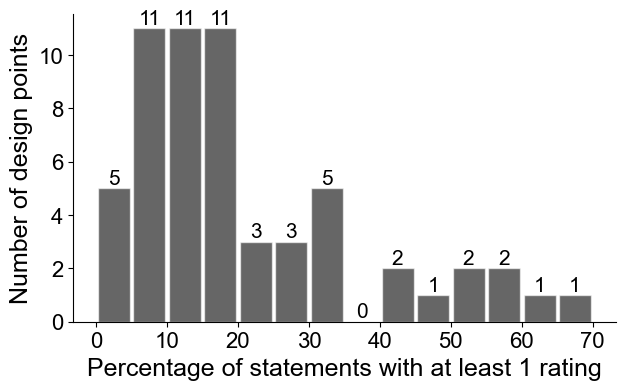

In [568]:
fig, ax = plt.subplots(1, 1, figsize=(7, 4))

freqs, hist, _ = ax.hist(100 * at_least_1 / design_point_df.loc[at_least_1.index, "count"], bins=np.arange(0, 75, 5), color="black", alpha=0.6,
        rwidth=0.9, edgecolor="white")
for i in range(len(freqs)):
    x = (hist[i] + hist[i+1]) / 2
    y = freqs[i]
    ax.text(x=x, y=y, s=int(y), size=15, va="bottom", ha="center")

ax.tick_params(axis="both", which="major", labelsize=16)
sns.despine(ax=ax)

ax.set_xlabel("Percentage of statements with at least 1 rating", size=18)
ax.set_ylabel("Number of design points", size=18)

plt.savefig("figures/descriptives/design_point_annotation_coverage.png", bbox_inches="tight")

In [569]:
hist.shape

(15,)

### Statetement commonsensicality, grouped by design point

In [570]:
properties_wide

name,fact,physical,literal language,positive,knowledge,everyday,design_point_id
statementId,,,,,,,
1,1,1,1,1,0,1,61
2,1,1,1,1,1,0,62
3,1,0,1,0,0,1,41
4,1,1,1,1,1,1,63
5,0,1,1,0,1,1,27
...,...,...,...,...,...,...,...
10121,1,1,1,1,1,1,63
10122,0,1,1,0,0,1,25
10123,1,1,1,1,1,1,63


In [571]:
statement_comm

,c_i,a_i,m_i
statementId,,,
1,1.000000,1.000000,1.000000
2,1.000000,1.000000,1.000000
4,1.000000,1.000000,1.000000
5,0.333333,1.000000,0.577350
6,0.940120,0.958084,0.949059
...,...,...,...
10121,0.938462,0.938462,0.938462
10122,0.527778,0.722222,0.617392
10123,0.820896,0.835821,0.828325


In [572]:
statement_comm_by_design_point = statement_comm.join(properties_wide, how="left")
statement_comm_by_design_point

,c_i,a_i,m_i,fact,physical,literal language,positive,knowledge,everyday,design_point_id
statementId,,,,,,,,,,
1,1.000000,1.000000,1.000000,1,1,1,1,0,1,61
2,1.000000,1.000000,1.000000,1,1,1,1,1,0,62
4,1.000000,1.000000,1.000000,1,1,1,1,1,1,63
5,0.333333,1.000000,0.577350,0,1,1,0,1,1,27
6,0.940120,0.958084,0.949059,0,1,1,1,0,1,29
...,...,...,...,...,...,...,...,...,...,...
10121,0.938462,0.938462,0.938462,1,1,1,1,1,1,63
10122,0.527778,0.722222,0.617392,0,1,1,0,0,1,25
10123,0.820896,0.835821,0.828325,1,1,1,1,1,1,63


In [573]:
gb = statement_comm_by_design_point.groupby(
    by=["fact", "physical", "literal language", "positive", "knowledge", "everyday"],
)

import numpy as np
import scipy.stats

def custom_mean(data):
    return np.mean(data * 100)

def custom_sd(data):
    return np.std(data * 100)

def mean_confidence_interval(data, confidence=0.95):
    if len(data) <= 1:
        return "N/A"
    data *= 100
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    lo = max(m - h, 0)
    hi = min(m + h, 100)
    return f"[{lo:.2f}, {hi:.2f}]"

In [575]:
df = pd.DataFrame(0, index=gb.count().index, columns=["N", "Mean $m_i$", "95% CI"])
df["N"] = gb.count()["design_point_id"]
df["Mean $m_i$"] = gb.agg([custom_mean])["c_i"]
df["95% CI"] = gb.agg([mean_confidence_interval])["c_i"]

In [576]:
print(df.reset_index().round(2).fillna("N/A").sort_values("N", ascending=False).to_markdown(index=False))

|   fact |   physical |   literal language |   positive |   knowledge |   everyday |   N |   Mean $m_i$ | 95% CI           |
|-------:|-----------:|-------------------:|-----------:|------------:|-----------:|----:|-------------:|:-----------------|
|      1 |          1 |                  1 |          1 |           1 |          1 | 519 |        82.14 | [80.20, 84.09]   |
|      0 |          0 |                  1 |          0 |           1 |          0 | 336 |        57.31 | [54.18, 60.45]   |
|      0 |          0 |                  1 |          0 |           0 |          1 | 228 |        67.51 | [63.25, 71.78]   |
|      0 |          0 |                  1 |          0 |           1 |          1 | 220 |        71.16 | [67.23, 75.09]   |
|      0 |          0 |                  1 |          0 |           0 |          0 | 178 |        57.22 | [52.50, 61.94]   |
|      1 |          1 |                  1 |          0 |           1 |          1 | 141 |        74.77 | [70.34, 79.20]   |


In [577]:
print(df[df["N"] >= 10].reset_index().round(2).fillna("N/A").sort_values("Mean $m_i$", ascending=False).to_markdown(index=False))

|   fact |   physical |   literal language |   positive |   knowledge |   everyday |   N |   Mean $m_i$ | 95% CI           |
|-------:|-----------:|-------------------:|-----------:|------------:|-----------:|----:|-------------:|:-----------------|
|      1 |          0 |                  1 |          1 |           1 |          1 |  19 |       100    | [100.00, 100.00] |
|      1 |          1 |                  1 |          1 |           1 |          1 | 519 |        82.14 | [80.20, 84.09]   |
|      1 |          0 |                  1 |          0 |           1 |          0 |  20 |        79.13 | [66.46, 91.80]   |
|      1 |          1 |                  1 |          0 |           1 |          1 | 141 |        74.77 | [70.34, 79.20]   |
|      1 |          0 |                  1 |          0 |           0 |          1 |  63 |        74.68 | [67.54, 81.83]   |
|      0 |          0 |                  1 |          0 |           1 |          1 | 220 |        71.16 | [67.23, 75.09]   |


In [578]:
df_small = df[df["N"] >= 10].reset_index()

In [579]:
import ast
df_small["CI lo"] = 0.
df_small["CI hi"] = 0.
for i, row in df_small.iterrows():
    lo, hi = ast.literal_eval(row["95% CI"])
    df_small.loc[i, "CI lo"] = lo
    df_small.loc[i, "CI hi"] = hi

In [582]:
df_small = df_small.sort_values(by="Mean $m_i$", ascending=True)
df_small = df_small.reset_index()
df_small

,level_0,index,fact,physical,literal language,positive,knowledge,everyday,N,Mean $m_i$,95% CI,CI lo,CI hi
0,0,12,0,1,1,1,1,1,14,33.770343,"[16.90, 50.65]",16.90,50.65
1,1,11,0,1,1,1,1,0,37,38.958032,"[27.99, 49.92]",27.99,49.92
2,2,8,0,1,1,0,1,0,136,41.391268,"[36.58, 46.20]",36.58,46.20
3,3,2,0,0,0,0,1,0,56,50.611086,"[41.78, 59.45]",41.78,59.45
4,4,9,0,1,1,0,1,1,77,50.830739,"[43.23, 58.43]",43.23,58.43
5,5,0,0,0,0,0,0,0,57,54.047687,"[46.04, 62.05]",46.04,62.05
6,6,3,0,0,0,0,1,1,37,55.606058,"[44.79, 66.42]",44.79,66.42
7,7,1,0,0,0,0,0,1,68,56.556685,"[48.42, 64.69]",48.42,64.69
8,8,4,0,0,1,0,0,0,178,57.220660,"[52.50, 61.94]",52.50,61.94
9,9,6,0,0,1,0,1,0,336,57.314494,"[54.18, 60.45]",54.18,60.45


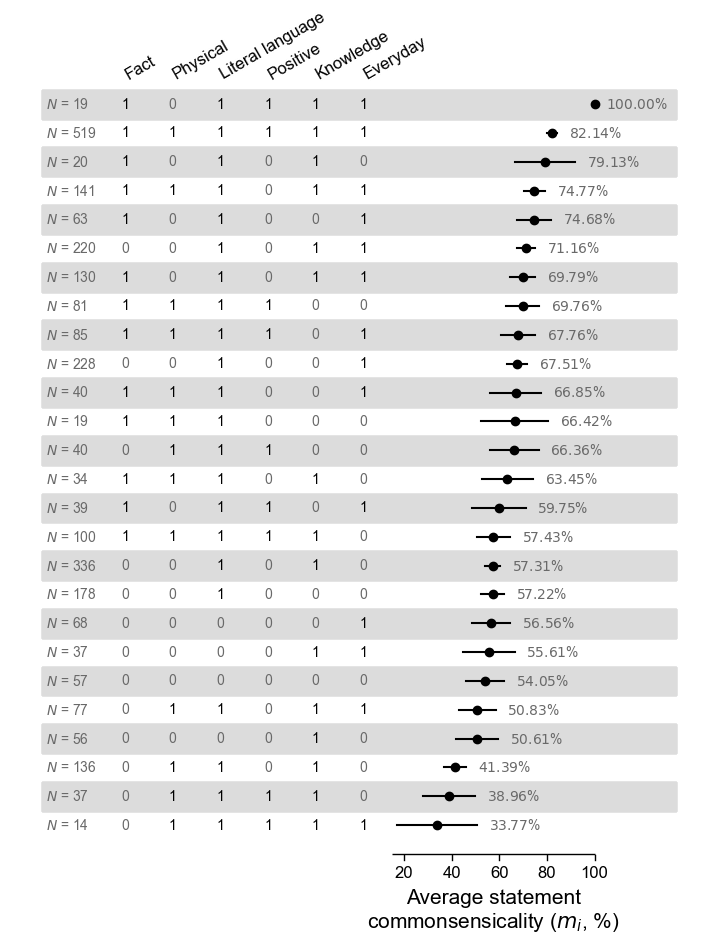

In [757]:
fig, ax = plt.subplots(1, 1, figsize=(9, 11))

# ax.set_xlim(x_lo, 115)

for i, row in df_small.iterrows():
    m, lo, hi = row["Mean $m_i$"], row["CI lo"], row["CI hi"]
    ax.scatter([m], [i], color="k", zorder=2)
    ax.plot([lo, hi], [i, i], color="k", zorder=4)
    ax.text(x=hi + 5, y=i, s=f"${m:.2f}$%", va="center", ha="left", size=10, color="dimgrey")
    N = row["N"]
    

x_lo, x_hi = ax.get_xlim()
features_pos = np.array([x_lo - 20 * i for i in range(6)])[::-1]
features_pos -= 10

for i, row in df_small.iterrows():
    features = row[["fact", "physical", "literal language", "positive", "knowledge", "everyday"]]
    for pos, (feature_name, feature_value) in zip(features_pos, features.items()):
        if feature_value == 1:
            ax.text(x=pos, y=i, s=feature_value, va="center", ha="center")
        else:
            ax.text(x=pos, y=i, s=feature_value, va="center", ha="center", color="dimgrey")
        if i % 2 == 1:
            ax.fill_between(x=[features_pos.min() - 35, x_hi + 30], y1=i-0.5, y2=i+0.5, color="gainsboro")

y_lo, y_hi = ax.get_ylim()
for pos, feature_name in zip(features_pos, ["fact", "physical", "literal language", "positive", "knowledge", "everyday"]):
    ax.text(x=pos-1, y=y_hi-1, s=feature_name.capitalize(), va="bottom", ha="left", rotation=30, size=12)

x_lo, x_hi = ax.get_xlim()
for i, row in df_small.iterrows():
    N = row["N"]
    m, lo, hi = row["Mean $m_i$"], row["CI lo"], row["CI hi"]
    ax.text(x=x_lo + 15, y=i, s=f"$N$ = {N}", va="center", ha="left", size=10, color="dimgrey")

ax.set_yticks([]); ax.set_xticks([])
sns.despine(left=True, bottom=True)


# Move y-axis (left spine) to x=0
# ax.spines['left'].set_position(('data', 0))

# Hide the bottom spine
ax.spines['bottom'].set_visible(False)

# Draw a new x-axis line starting at x=0
ymin, ymax = ax.get_ylim()
ax.hlines(y=-1, xmin=15, xmax=100, color='black', linewidth=1)

for i in range(20, 105, 20):
    ax.plot([i, i], [-1.05, -1.2], color="k", linewidth=1)
    ax.text(x=i, y=-1.4, s=i, ha="center", va="top", size=12)

ax.text(x=(100 + 15) /2, y=-2.2, s="Average statement\ncommonsensicality ($m_i$, %)", size=15, ha="center", va="top")

plt.savefig("figures/descriptives/avg_statement_comm_design_point.png", bbox_inches="tight", dpi=120)

In [368]:
(100 - 15) /2

42.5

#### Regression analysis

Reference group: all features = 0

In [589]:
statement_comm_by_design_point

,c_i,a_i,m_i,fact,physical,literal language,positive,knowledge,everyday,design_point_id
statementId,,,,,,,,,,
1,1.000000,1.000000,1.000000,1,1,1,1,0,1,61
2,1.000000,1.000000,1.000000,1,1,1,1,1,0,62
4,1.000000,1.000000,1.000000,1,1,1,1,1,1,63
5,0.333333,1.000000,0.577350,0,1,1,0,1,1,27
6,0.940120,0.958084,0.949059,0,1,1,1,0,1,29
...,...,...,...,...,...,...,...,...,...,...
10121,0.938462,0.938462,0.938462,1,1,1,1,1,1,63
10122,0.527778,0.722222,0.617392,0,1,1,0,0,1,25
10123,0.820896,0.835821,0.828325,1,1,1,1,1,1,63


In [594]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

regression_df = statement_comm_by_design_point.copy(deep=True)
md = sm.GLM(statement_comm_by_design_point["m_i"] * 100, 
            statement_comm_by_design_point[["fact", "physical", "literal language", "positive", "knowledge", "everyday"]],
            family=sm.families.Gaussian())
res = md.fit()

In [595]:
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                    m_i   No. Observations:                 2896
Model:                            GLM   Df Residuals:                     2890
Model Family:                Gaussian   Df Model:                            5
Link Function:               Identity   Scale:                          970.47
Method:                          IRLS   Log-Likelihood:                -14065.
Date:                Tue, 20 May 2025   Deviance:                   2.8047e+06
Time:                        14:45:24   Pearson chi2:                 2.80e+06
No. Iterations:                     3   Pseudo R-squ. (CS):            -0.2102
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
fact                 5.9213      1.607  

## New